In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
df_trainset = pd.read_csv('train.csv')
df_testset = pd.read_csv('test.csv')

# Preliminary examination 
Examining the shape and distribution of the data.

In [3]:
df_trainset.shape, df_testset.shape

((200000, 202), (200000, 201))

Both data sets have 200,000 rows and 2001 features.  This excludes the response variable found in the training set.

Examining the head of the data.

In [4]:
df_testset.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 201 columns]

In [5]:
df_testset.tail()

ID_code    var_0   var_1    var_2   var_3    var_4    var_5  \
199995  test_199995  13.1678  1.0136  10.4333  6.7997   8.5974  -4.1641   
199996  test_199996   9.7171 -9.1462   7.3443  9.1421  12.8936   3.0191   
199997  test_199997  11.6360  2.2769  11.2074  7.7649  12.6796  11.3224   
199998  test_199998  13.5745 -0.5134  13.6584  7.4855  11.2241 -11.3037   
199999  test_199999  10.4664  1.8070  10.2277  6.0654  10.0258   1.0789   

         var_6    var_7   var_8  ...  var_190  var_191  var_192  var_193  \
199995  4.8579  14.7625 -2.7239  ...   2.0544   9.6849   4.6734  -1.3660   
199996  5.6888  18.8862  5.0915  ...   5.0071   6.6548   1.8197   2.4104   
199997  5.3883  18.3794  1.6603  ...   5.1536   2.6498   2.4937  -0.0637   
199998  4.1959  16.8280  5.3208  ...   3.4259   8.5012   2.2713   5.7621   
199999  4.8879  14.4892 -0.5902  ...   0.1398   9.2828   1.3601   4.8985   

        var_194  var_195  var_196  var_197  var_198  var_199  
199995  12.8721   1.2013  -4.6195   9.1568  18.2102   4.8801  
199996  18.9037  -0.9337   2.9995   9.1112  18.1740 -20.7689  
199997  20.0609  -1.1742  -4.1524   9.1933  11.7905 -22.2762  
199998  17.0056   1.1763  -2.3761   8.1079   8.7735  -0.2122  
199999  20.0926  -1.3048  -2.5981  10.3378  14.3340  -7.7094  

[5 rows x 201 columns]

In [6]:
df_trainset.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [7]:
df_trainset.tail()

ID_code  target    var_0   var_1    var_2   var_3    var_4  \
199995  train_199995       0  11.4880 -0.4956   8.2622  3.5142  10.3404   
199996  train_199996       0   4.9149 -2.4484  16.7052  6.6345   8.3096   
199997  train_199997       0  11.2232 -5.0518  10.5127  5.6456   9.3410   
199998  train_199998       0   9.7148 -8.6098  13.6104  5.7930  12.5173   
199999  train_199999       0  10.8762 -5.7105  12.1183  8.0328  11.5577   

          var_5   var_6    var_7  ...  var_190  var_191  var_192  var_193  \
199995  11.6081  5.6709  15.1516  ...   6.1415  13.2305   3.9901   0.9388   
199996 -10.5628  5.8802  21.5940  ...   4.9611   4.6549   0.6998   1.8341   
199997  -5.4086  4.5555  21.5571  ...   4.0651   5.4414   3.1032   4.8793   
199998   0.5339  6.0479  17.0152  ...   2.6840   8.6587   2.7337  11.1178   
199999   0.3488  5.2839  15.2058  ...   8.9842   1.6893   0.1276   0.3766   

        var_194  var_195  var_196  var_197  var_198  var_199  
199995  18.0249  -1.7939   2.1661   8.5326  16.6660 -17.8661  
199996  22.2717   1.7337  -2.1651   6.7419  15.9054   0.3388  
199997  23.5311  -1.5736   1.2832   8.7155  13.8329   4.1995  
199998  20.4158  -0.0786   6.7980  10.0342  15.5289 -13.9001  
199999  15.2101  -2.4907  -2.2342   8.1857  12.1284   0.1385  

[5 rows x 202 columns]

The data doesn't apear to be corrupted. We should be able to to drop the ID_code without any issue. All other variables are real numbers

In [8]:
df_testset.describe()

var_0          var_1          var_2          var_3  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       10.658737      -1.624244      10.707452       6.788214   
std         3.036716       4.040509       2.633888       2.052724   
min         0.188700     -15.043400       2.355200      -0.022400   
25%         8.442975      -4.700125       8.735600       5.230500   
50%        10.513800      -1.590500      10.560700       6.822350   
75%        12.739600       1.343400      12.495025       8.327600   
max        22.323400       9.385100      18.714100      13.142000   

               var_4          var_5          var_6          var_7  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       11.076399      -5.050558       5.415164      16.529143   
std         1.616456       7.869293       0.864686       3.424482   
min         5.484400     -27.767000       2.216400       5.713700   
25%         9.891075     -11.201400       4.772600      13.933900   
50%        11.099750      -4.834100       5.391600      16.422700   
75%        12.253400       0.942575       6.005800      19.094550   
max        16.037100      17.253700       8.302500      28.292800   

               var_8          var_9  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean        0.277135       7.569407  ...       3.189766       7.458269   
std         3.333375       1.231865  ...       4.551239       3.025189   
min        -9.956000       4.243300  ...     -14.093300      -2.407000   
25%        -2.303900       6.623800  ...      -0.095000       5.166500   
50%         0.372000       7.632000  ...       3.162400       7.379000   
75%         2.930025       8.584825  ...       6.336475       9.531100   
max         9.665500      11.003600  ...      20.359000      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.925944       3.322016      17.996967      -0.133657   
std         1.479966       3.995599       3.140652       1.429678   
min        -3.340900     -11.413100       9.382800      -4.911900   
25%         0.882975       0.587600      15.634775      -1.160700   
50%         1.892600       3.428500      17.977600      -0.162000   
75%         2.956000       6.174200      20.391725       0.837900   
max         8.005000      17.632600      27.947800       4.545400   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.290899       8.912428      15.869184      -3.246342  
std         5.446346       0.920904       3.008717      10.398589  
min       -13.944200       6.169600       6.584000     -39.457800  
25%        -1.948600       8.260075      13.847275     -11.124000  
50%         2.403600       8.892800      15.943400      -2.725950  
75%         6.519800       9.595900      18.045200       4.935400  
max        15.920700      12.275800      26.538400      27.907400  

[8 rows x 200 columns]

All variables have relatively small standard devaitions. The variance among the the standard deviations are relatively large.  The variance among the mean values are large.

In [9]:
# Checking for columns with missing values
df_trainset.columns[df_trainset.isna().any()]

Index([], dtype='object')

In [10]:
df_testset.columns[df_testset.isna().any()]

Index([], dtype='object')

There are no missing values in the training and test data sets.

In [11]:
df_trainset.target.value_counts(normalize=True)*100

0    89.951
1    10.049
Name: target, dtype: float64

We have a skewed classification problem. The target value occurs only 10 percent of the time.

In [13]:
correlation = df_trainset.corr()[2:]
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(correlation)] = 1

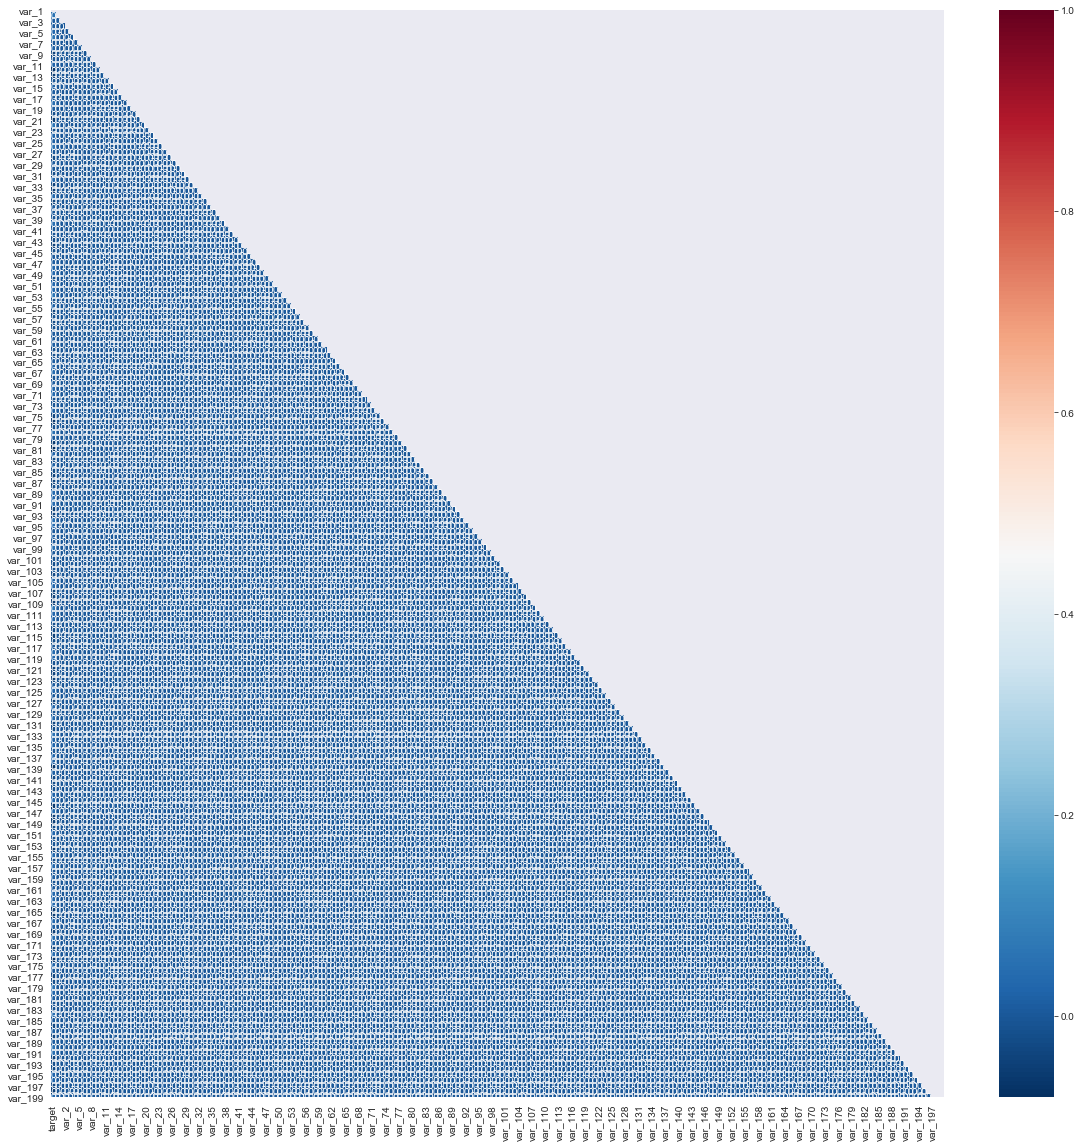

In [15]:
plt.figure(figsize= (20,20))
sns.heatmap(correlation,
           cmap = 'RdBu_r',
           annot= True,
           mask = mask,
           fmt = '.0f')
plt.show()


this was not usefull time to try something else

In [16]:
correlation = correlation * 100
correlation

target     var_0       var_1       var_2       var_3       var_4  \
var_1    5.034263 -0.054370  100.000000    0.398049    0.001023    0.030349   
var_2    5.587035  0.657283    0.398049  100.000000    0.100086    0.072285   
var_3    1.105522  0.380076    0.001023    0.100086  100.000000   -0.032170   
var_4    1.091464  0.132581    0.030349    0.072285   -0.032170  100.000000   
var_5    3.097863  0.304625   -0.090173    0.156891    0.325335   -0.136816   
...           ...       ...         ...         ...         ...         ...   
var_195  2.828454  0.207289   -0.078527   -0.106971    0.120600    0.370601   
var_196  2.360780  0.438559   -0.037700    0.395184   -0.279996    0.051305   
var_197 -3.530274 -0.075274   -0.415696    0.107819    0.116390   -0.004602   
var_198 -5.299964 -0.577570   -0.486096   -0.087707   -0.165091   -0.182067   
var_199  2.543448  0.384993    0.228712    0.385483    0.050553   -0.078609   

              var_5     var_6     var_7     var_8  ...   var_190   var_191  \
var_1     -0.090173  0.325773  0.151118  0.409849  ...  0.662744  0.362097   
var_2      0.156891  0.088252 -0.099060  0.264840  ...  0.019658  0.128457   
var_3      0.325335 -0.077439  0.249995  0.355340  ...  0.015083  0.244538   
var_4     -0.136816  0.004883  0.454889  0.119362  ...  0.151379  0.435664   
var_5    100.000000  0.258778 -0.099495  0.014694  ...  0.146554 -0.002225   
...             ...       ...       ...       ...  ...       ...       ...   
var_195   -0.127366  0.124377  0.185382  0.139591  ...  0.457070  0.086959   
var_196    0.287997  0.537849  0.104522 -0.324193  ... -0.084733  0.246647   
var_197   -0.053478 -0.356518  0.346603 -0.458268  ... -0.497389  0.090641   
var_198   -0.095320 -0.302467  0.065006  0.294997  ... -0.015261 -0.006721   
var_199    0.276714  0.609630 -0.145675  0.085367  ... -0.040371  0.359510   

          var_192   var_193   var_194     var_195     var_196     var_197  \
var_1   -0.260383  0.115344 -0.255746   -0.078527   -0.037700   -0.415696   
var_2   -0.339960  0.054905  0.210407   -0.106971    0.395184    0.107819   
var_3   -0.152999 -0.169890 -0.105372    0.120600   -0.279996    0.116390   
var_4    0.334702  0.081344 -0.006801    0.370601    0.051305   -0.004602   
var_5    0.111552 -0.223749 -0.254289   -0.127366    0.287997   -0.053478   
...           ...       ...       ...         ...         ...         ...   
var_195 -0.474491 -0.314283 -0.120130  100.000000    0.251699   -0.417024   
var_196 -0.138562 -0.530820 -0.504014    0.251699  100.000000   -0.045359   
var_197 -0.052703  0.506832  0.088433   -0.417024   -0.045359  100.000000   
var_198  0.345143  0.164630  0.319427   -0.053605    0.025314    0.118252   
var_199 -0.123888 -0.055164 -0.561508    0.204189    0.060689    0.499055   

            var_198     var_199  
var_1     -0.486096    0.228712  
var_2     -0.087707    0.385483  
var_3     -0.165091    0.050553  
var_4     -0.182067   -0.078609  
var_5     -0.095320    0.276714  
...             ...         ...  
var_195   -0.053605    0.204189  
var_196    0.025314    0.060689  
var_197    0.118252    0.499055  
var_198  100.000000   -0.473056  
var_199   -0.473056  100.000000  

[199 rows x 201 columns]

In [17]:
for col in correlation.columns:
    correlation.loc[col, col] = 0

In [21]:
for col in range(len(correlation)):
    if correlation[abs(correlation) > 50].any()[col] == True:
        print(correlation[abs(correlation) > 50].any()[[col]])

There does not apear to be any highly corellated variabels

In [24]:
df_trainset.groupby('target').describe()

var_0                                                              \
           count       mean       std     min       25%       50%        75%   
target                                                                         
0       179902.0  10.626681  3.008564  0.4084  8.429500  10.47860  12.693075   
1        20098.0  11.156418  3.270293  0.4528  8.695875  11.00135  13.343700   

                    var_1            ...    var_198            var_199  \
            max     count      mean  ...        75%      max     count   
target                               ...                                 
0       20.3150  179902.0 -1.695770  ...  18.095400  26.0791  179902.0   
1       19.4583   20098.0 -1.017613  ...  17.776425  25.8571   20098.0   

                                                                             
            mean        std      min        25%      50%       75%      max  
target                                                                       
0      -3.415273  10.434525 -38.8528 -11.312025 -2.91400  4.741400  28.5007  
1      -2.532243  10.435910 -38.8528 -10.285050 -1.97185  5.701475  24.5646  

[2 rows x 1600 columns]

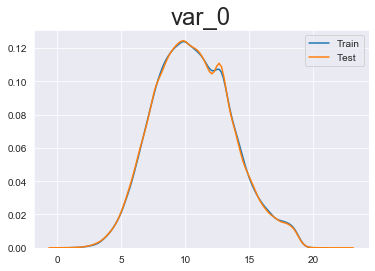

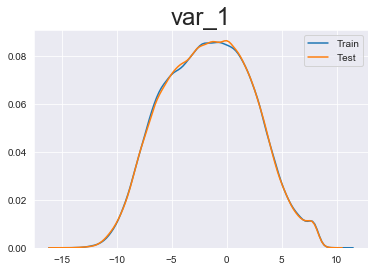

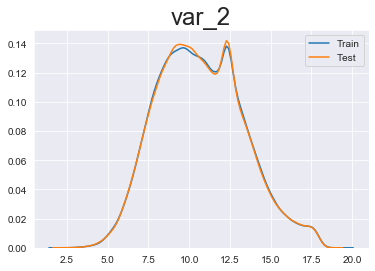

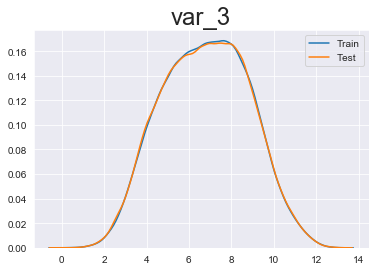

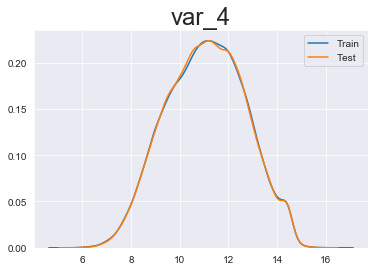

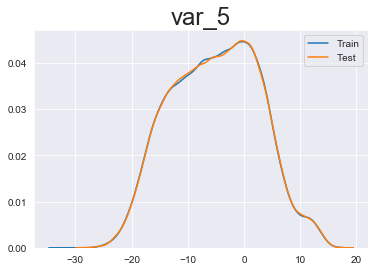

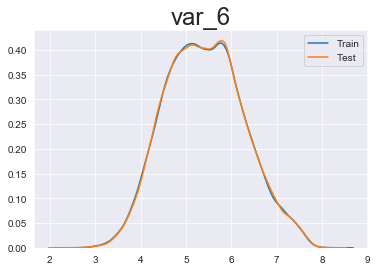

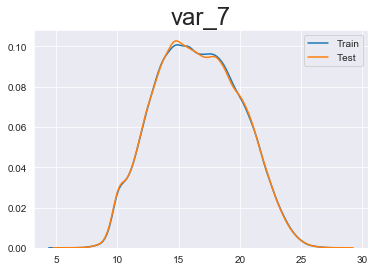

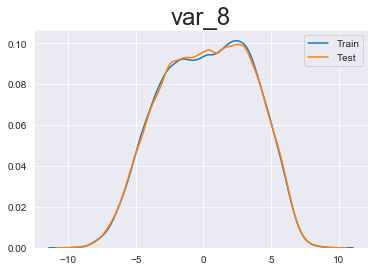

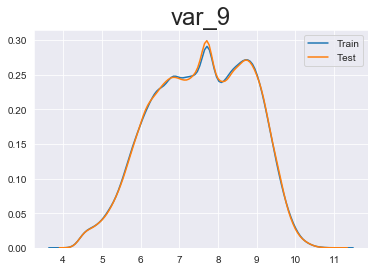

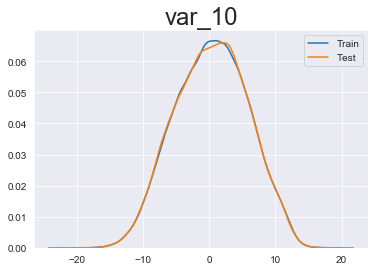

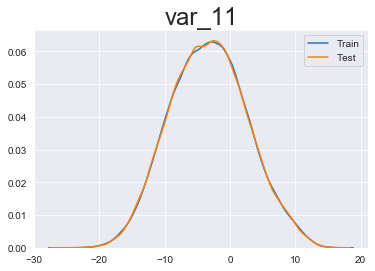

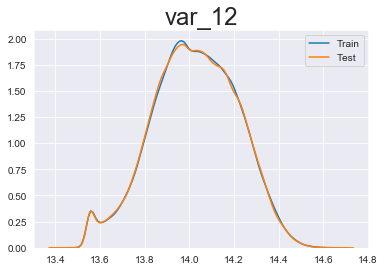

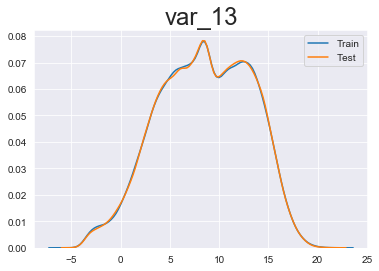

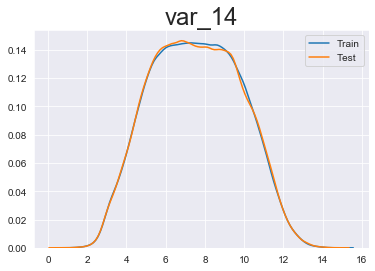

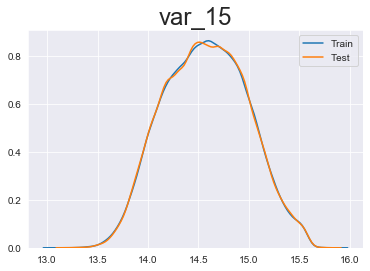

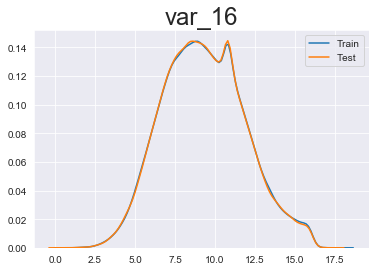

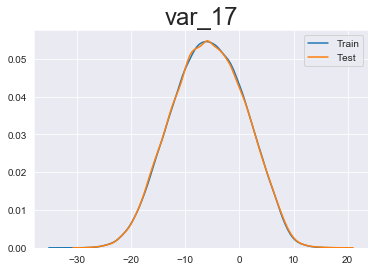

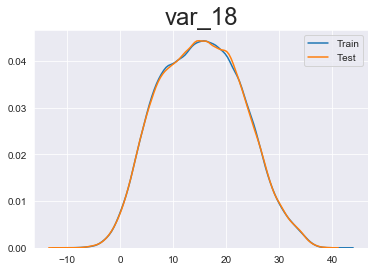

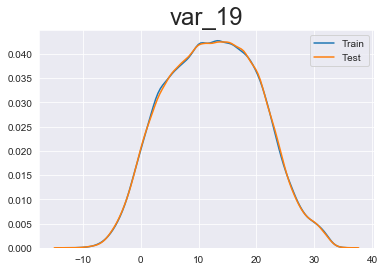

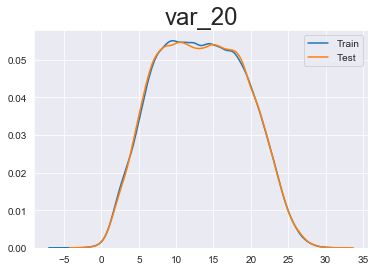

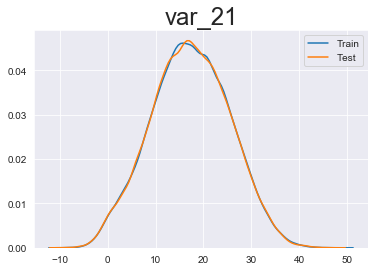

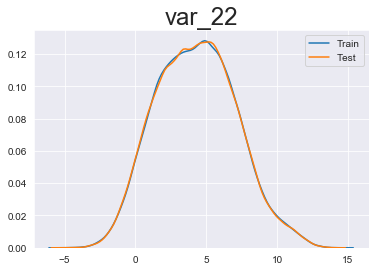

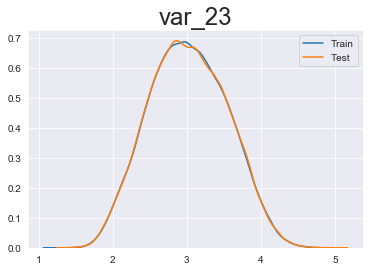

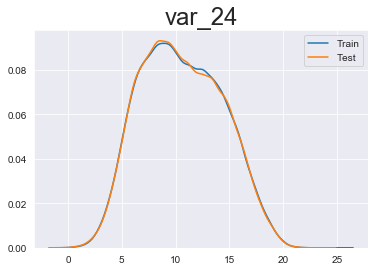

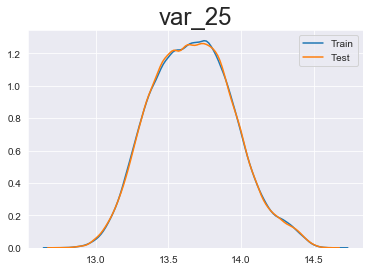

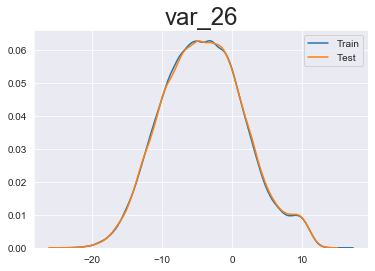

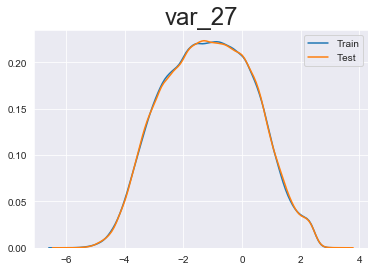

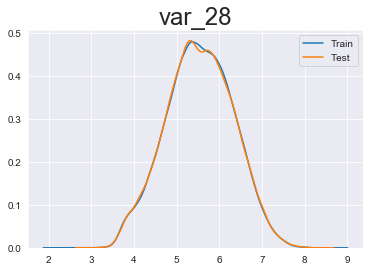

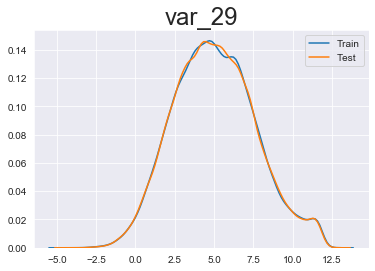

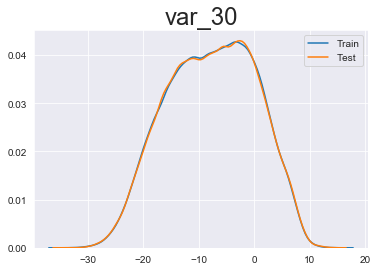

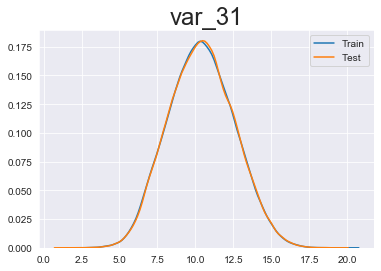

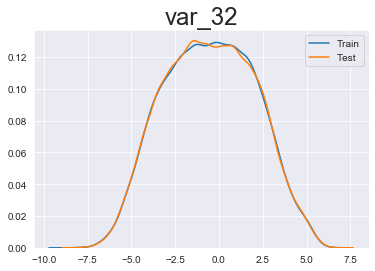

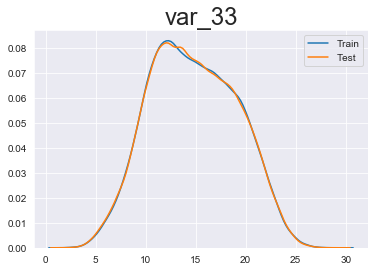

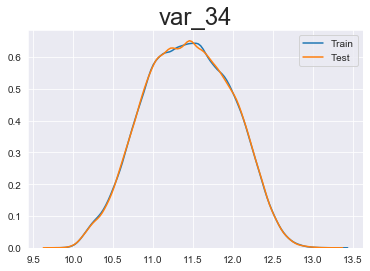

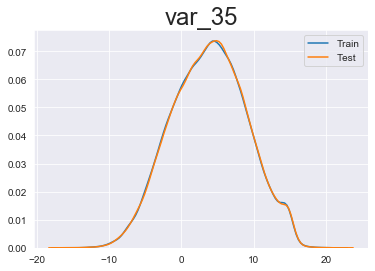

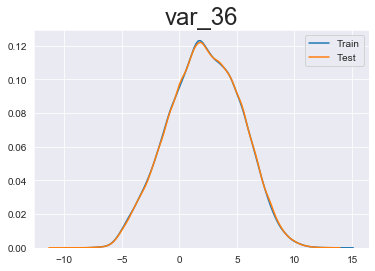

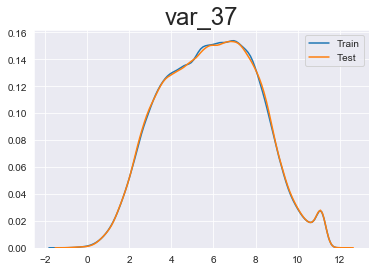

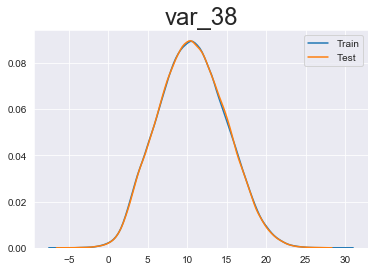

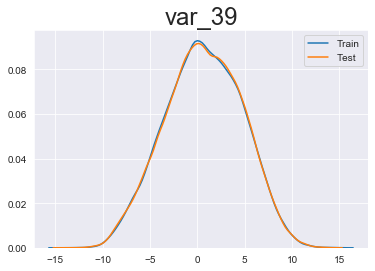

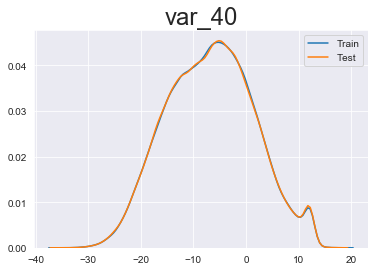

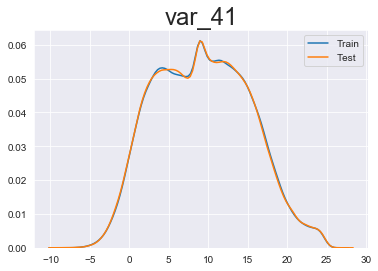

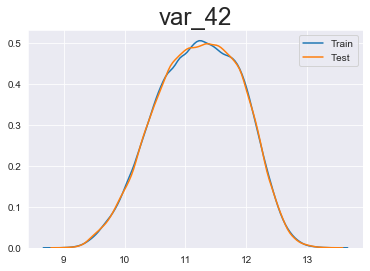

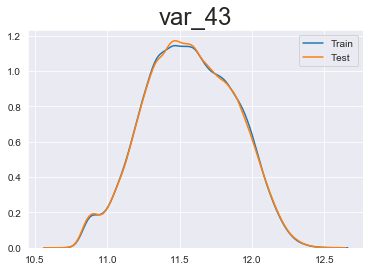

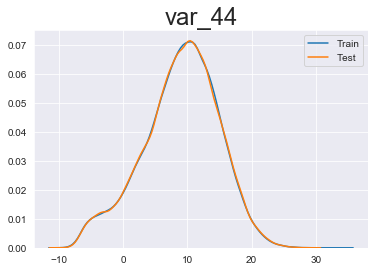

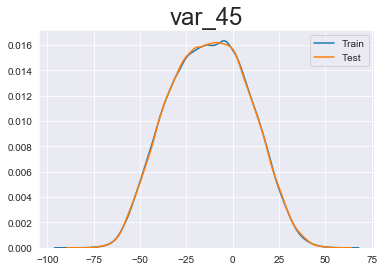

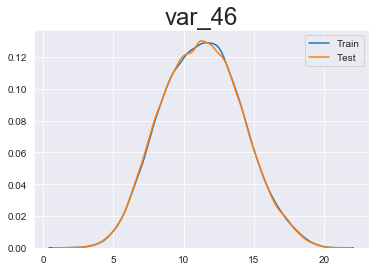

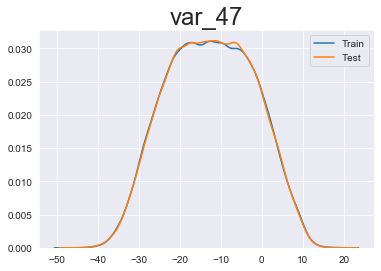

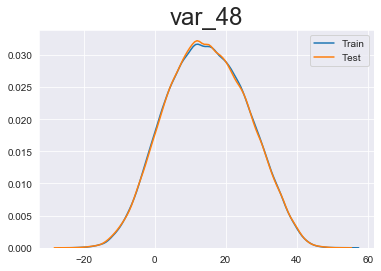

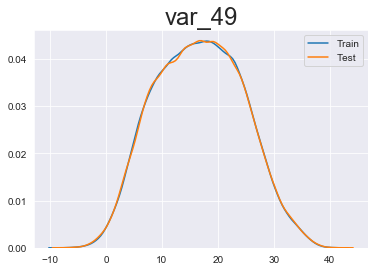

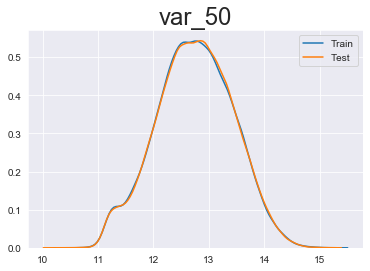

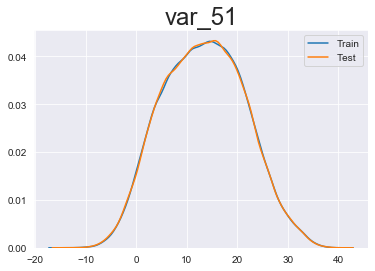

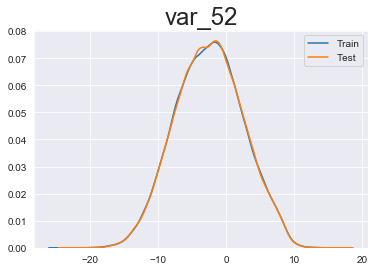

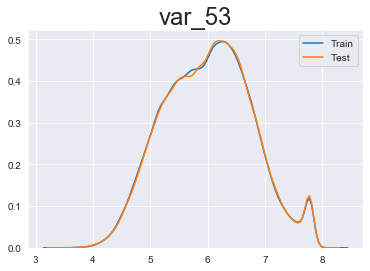

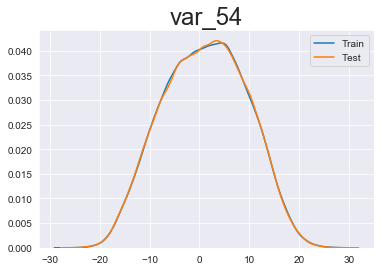

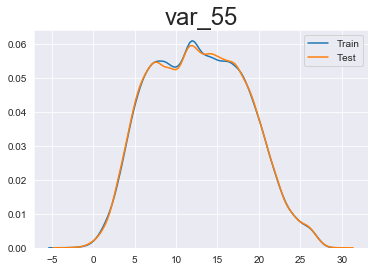

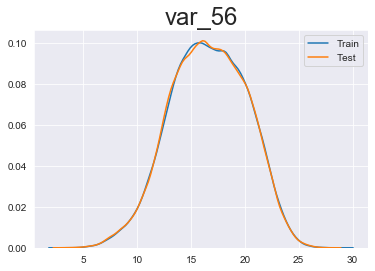

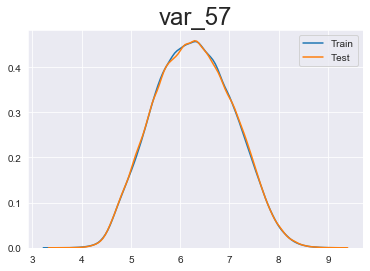

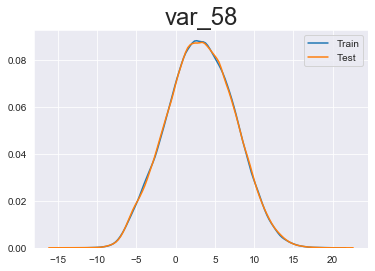

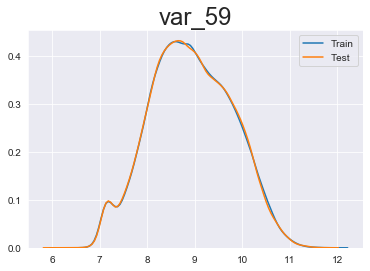

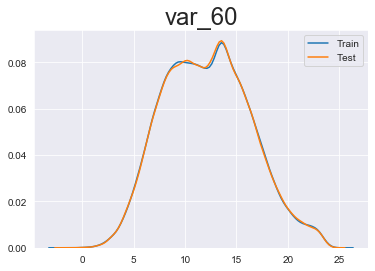

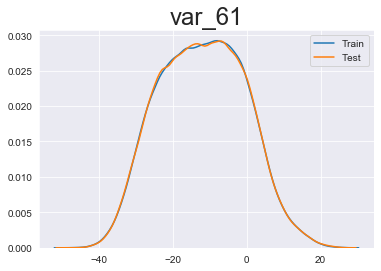

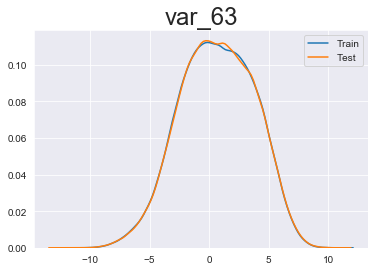

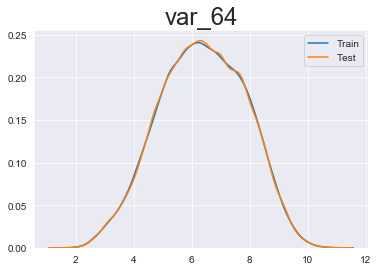

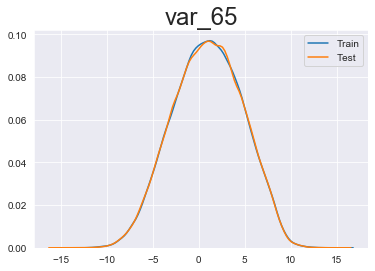

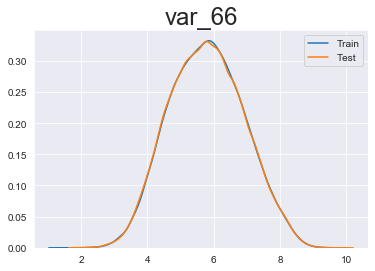

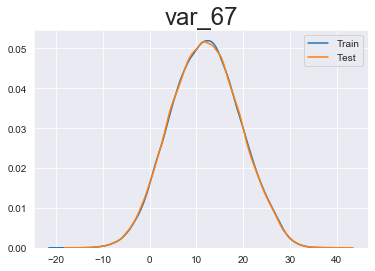

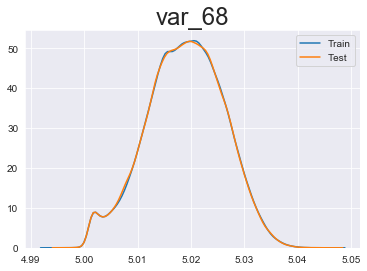

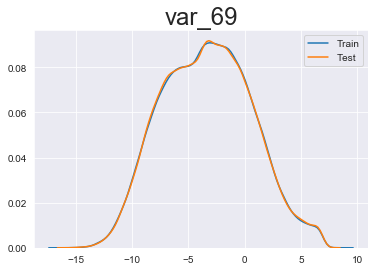

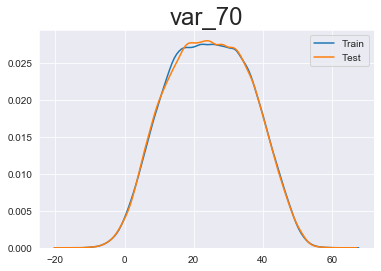

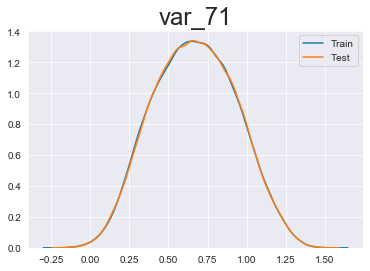

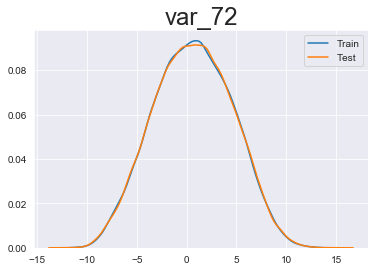

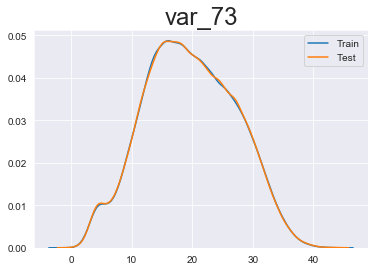

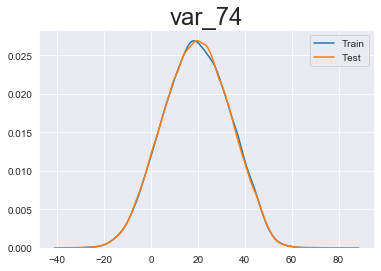

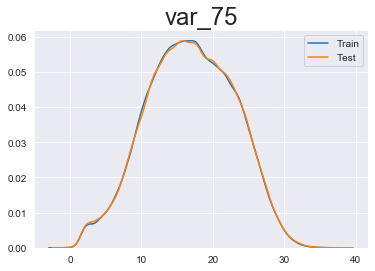

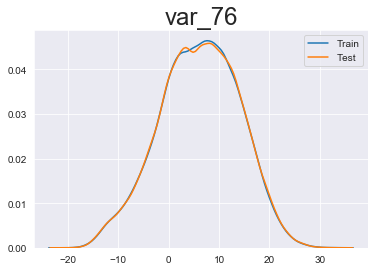

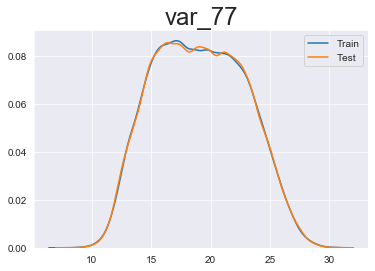

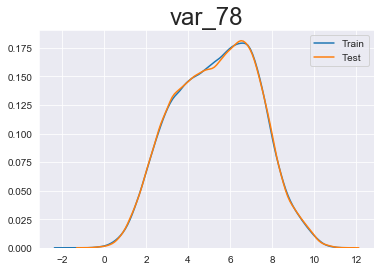

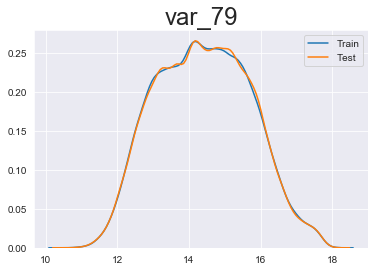

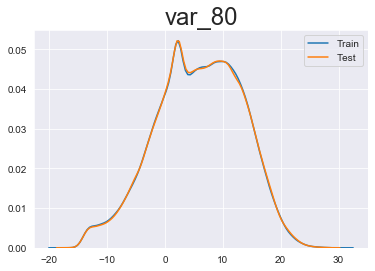

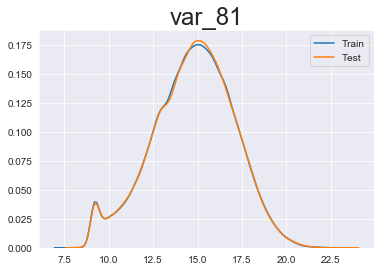

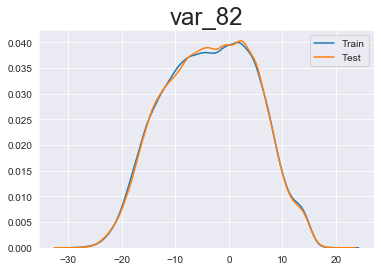

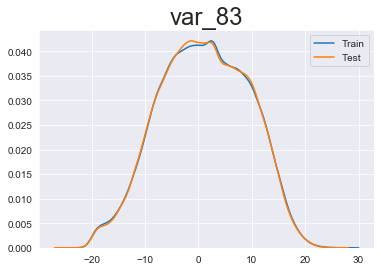

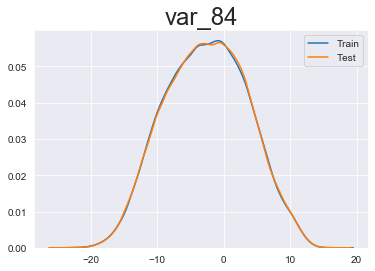

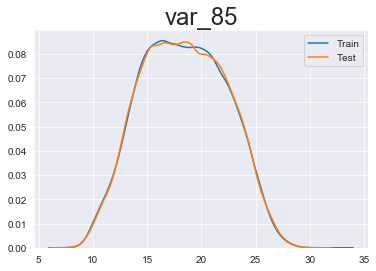

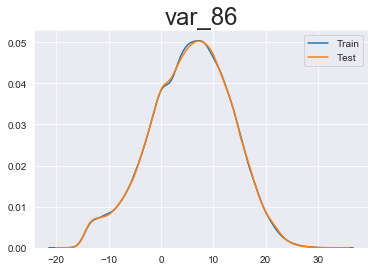

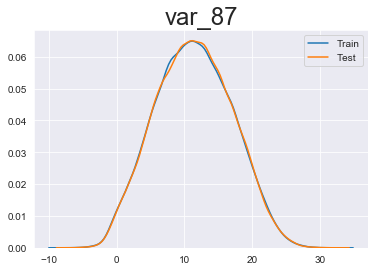

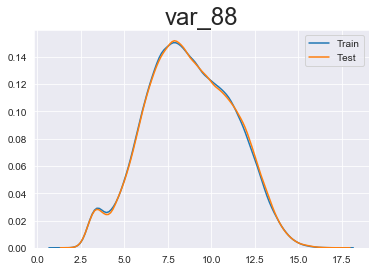

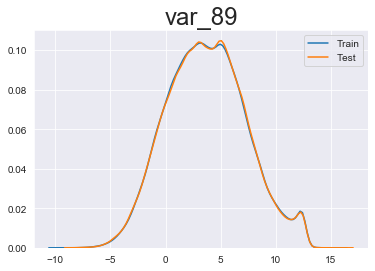

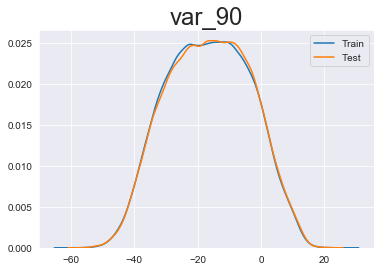

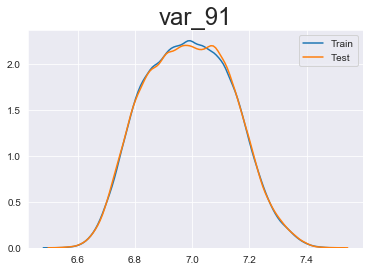

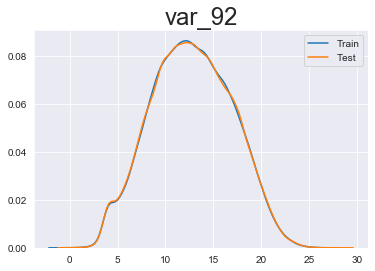

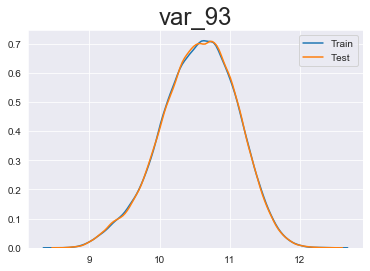

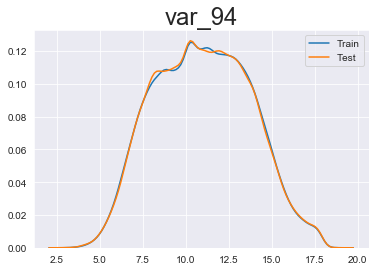

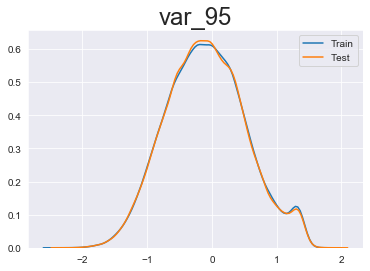

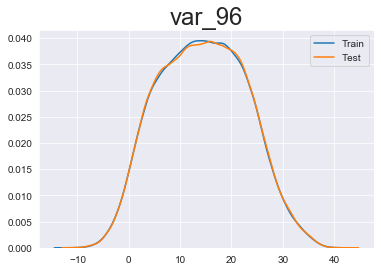

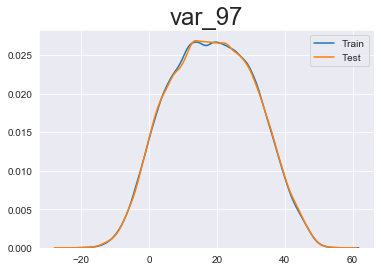

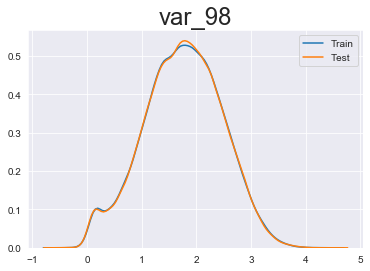

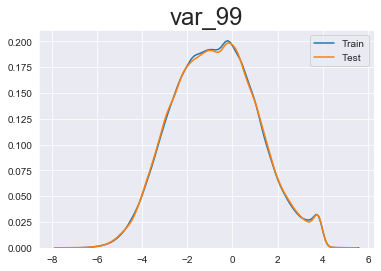

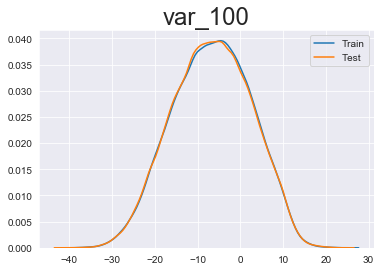

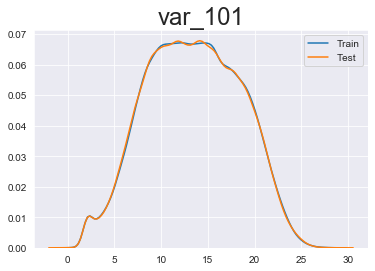

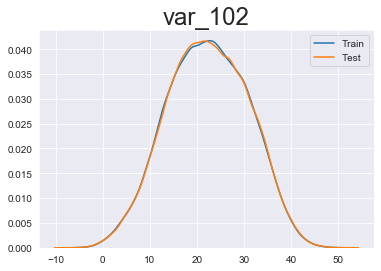

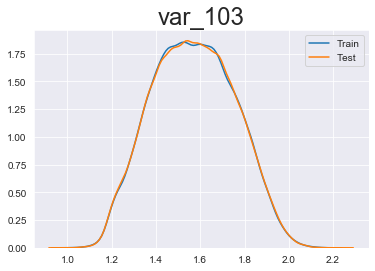

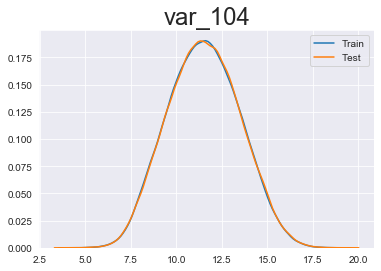

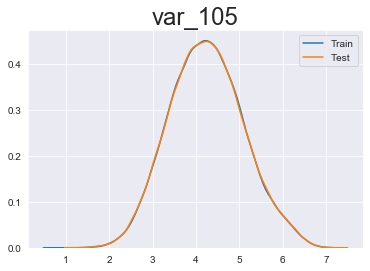

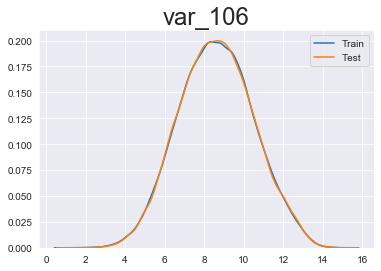

In [ ]:
for col in df_trainset.columns[2:]:
    sns.kdeplot(df_trainset[col])
    sns.kdeplot(df_testset[col])
    plt.legend(labels=('Train', 'Test'))
    plt.title(label = col, size = 24)
    plt.show()

In [13]:
for col in df_testset.columns[2:]:
    print('{} \n\ttraining set: {} unique values \n\ttest set: {} unique values \n\tDifference: {} unique values'.format(col,
                                                                                                           df_trainset[col].nunique(),
                                                                                                           df_testset[col].nunique(), 
                                                                                                            df_trainset[col].nunique() - df_testset[col].nunique()))                                                                                                          

var_1 
	training set: 108932 unique values 
	test set: 71661 unique values 
	Difference: 37271 unique values
var_2 
	training set: 86555 unique values 
	test set: 61865 unique values 
	Difference: 24690 unique values
var_3 
	training set: 74597 unique values 
	test set: 56507 unique values 
	Difference: 18090 unique values
var_4 
	training set: 63515 unique values 
	test set: 49995 unique values 
	Difference: 13520 unique values
var_5 
	training set: 141029 unique values 
	test set: 83228 unique values 
	Difference: 57801 unique values
var_6 
	training set: 38599 unique values 
	test set: 33273 unique values 
	Difference: 5326 unique values
var_7 
	training set: 103063 unique values 
	test set: 69487 unique values 
	Difference: 33576 unique values
var_8 
	training set: 98617 unique values 
	test set: 67521 unique values 
	Difference: 31096 unique values
var_9 
	training set: 49417 unique values 
	test set: 41583 unique values 
	Difference: 7834 unique values
var_10 
	training set: 1287

var_82 
	training set: 144829 unique values 
	test set: 84426 unique values 
	Difference: 60403 unique values
var_83 
	training set: 144281 unique values 
	test set: 84275 unique values 
	Difference: 60006 unique values
var_84 
	training set: 133766 unique values 
	test set: 80933 unique values 
	Difference: 52833 unique values
var_85 
	training set: 108437 unique values 
	test set: 71490 unique values 
	Difference: 36947 unique values
var_86 
	training set: 140594 unique values 
	test set: 82894 unique values 
	Difference: 57700 unique values
var_87 
	training set: 125296 unique values 
	test set: 77815 unique values 
	Difference: 47481 unique values
var_88 
	training set: 84918 unique values 
	test set: 61261 unique values 
	Difference: 23657 unique values
var_89 
	training set: 103522 unique values 
	test set: 69297 unique values 
	Difference: 34225 unique values
var_90 
	training set: 157210 unique values 
	test set: 88329 unique values 
	Difference: 68881 unique values
var_91 
	tr

var_164 
	training set: 122744 unique values 
	test set: 77121 unique values 
	Difference: 45623 unique values
var_165 
	training set: 119403 unique values 
	test set: 75703 unique values 
	Difference: 43700 unique values
var_166 
	training set: 17902 unique values 
	test set: 16683 unique values 
	Difference: 1219 unique values
var_167 
	training set: 140954 unique values 
	test set: 83182 unique values 
	Difference: 57772 unique values
var_168 
	training set: 97227 unique values 
	test set: 66656 unique values 
	Difference: 30571 unique values
var_169 
	training set: 18242 unique values 
	test set: 16759 unique values 
	Difference: 1483 unique values
var_170 
	training set: 113720 unique values 
	test set: 73455 unique values 
	Difference: 40265 unique values
var_171 
	training set: 125914 unique values 
	test set: 77918 unique values 
	Difference: 47996 unique values
var_172 
	training set: 143366 unique values 
	test set: 83916 unique values 
	Difference: 59450 unique values
var_17

In [7]:
df0 = df_trainset[df_trainset.target == 0]
df1 = df_trainset[df_trainset.target == 1]

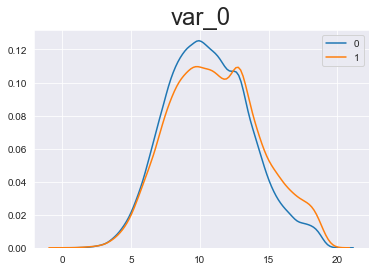

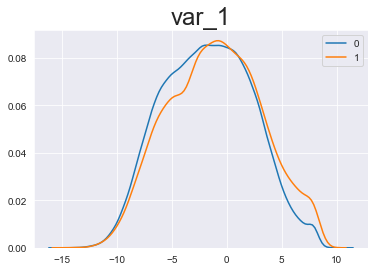

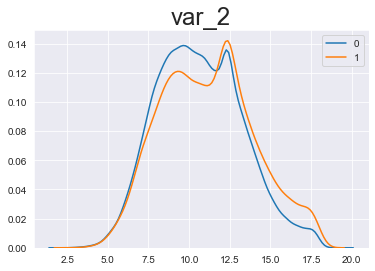

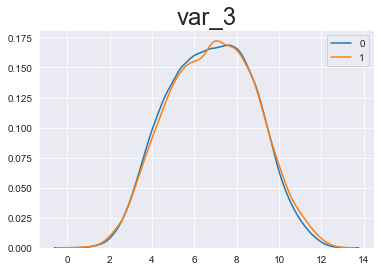

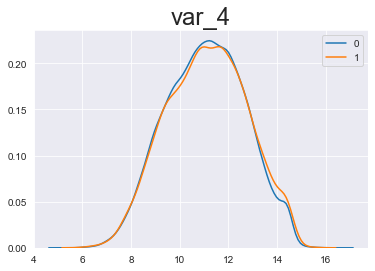

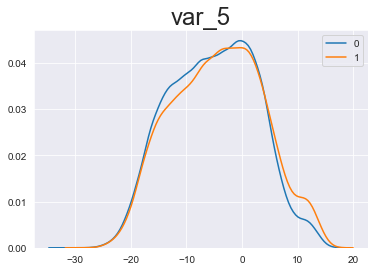

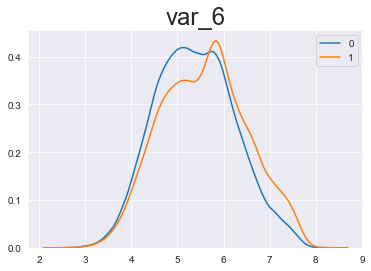

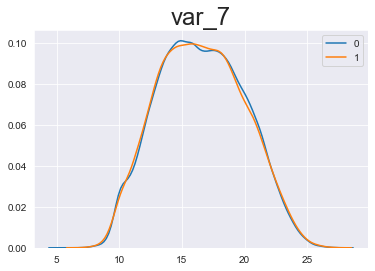

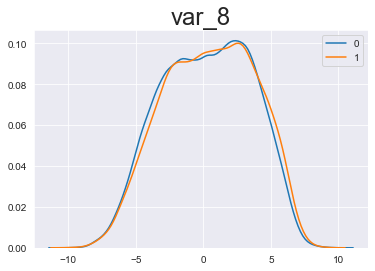

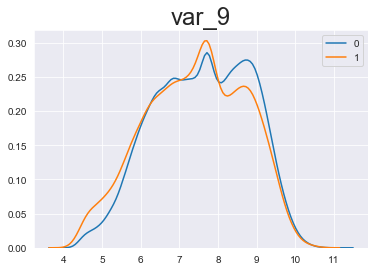

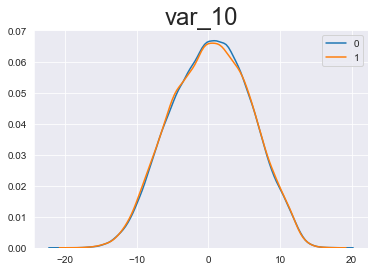

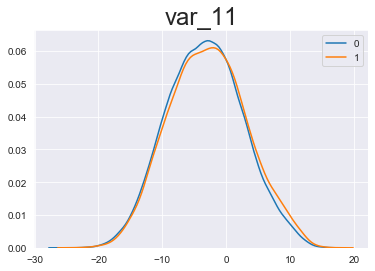

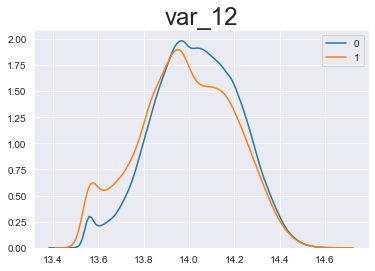

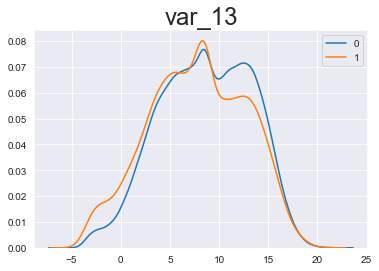

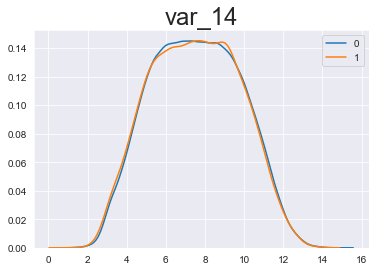

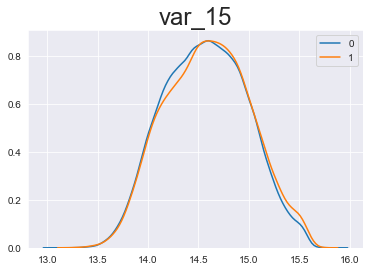

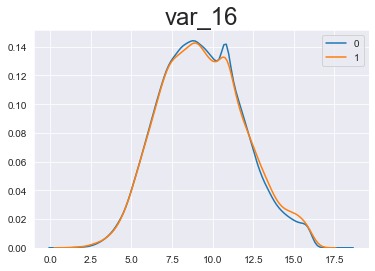

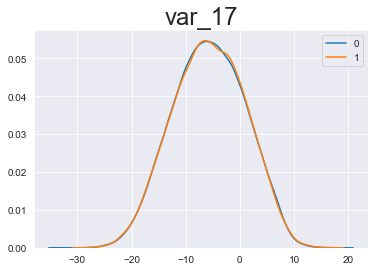

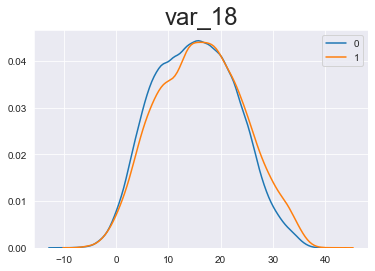

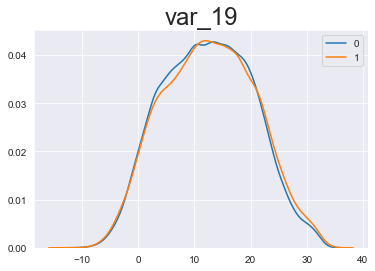

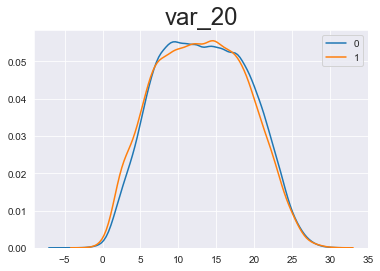

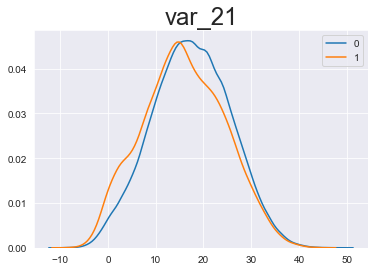

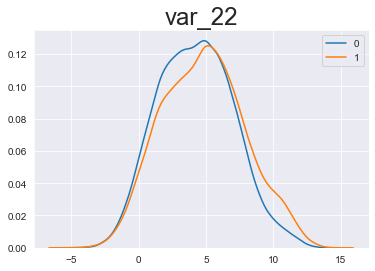

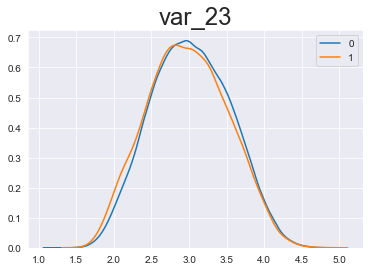

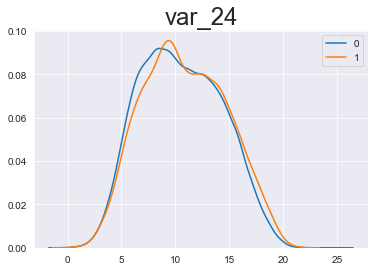

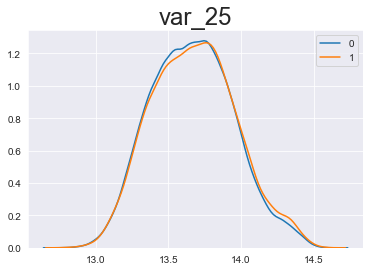

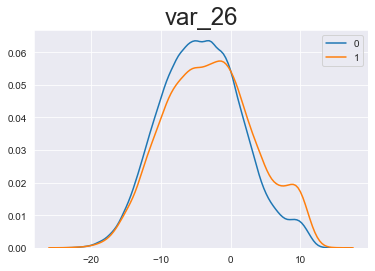

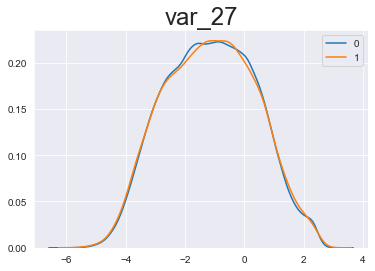

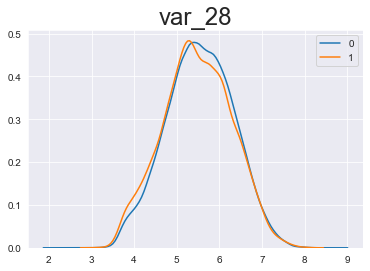

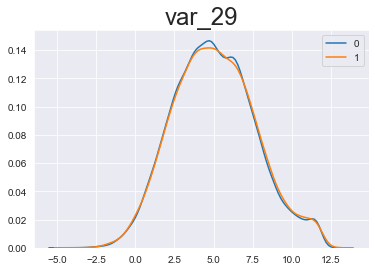

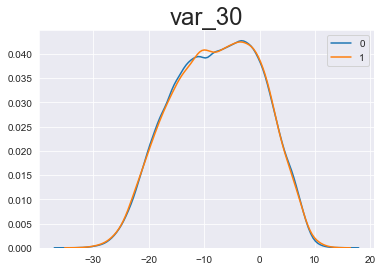

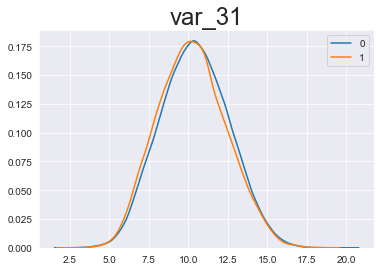

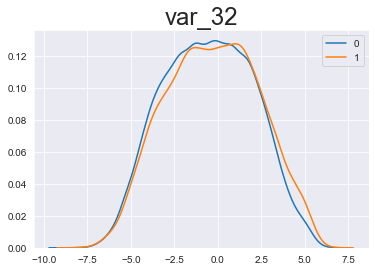

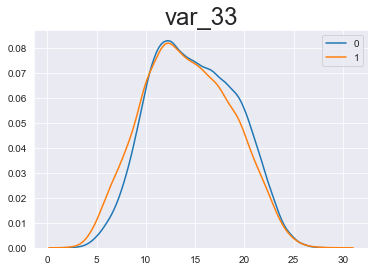

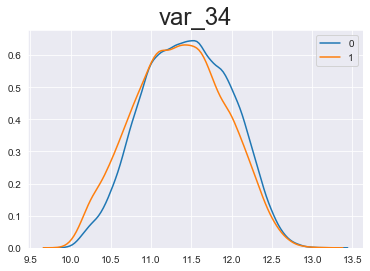

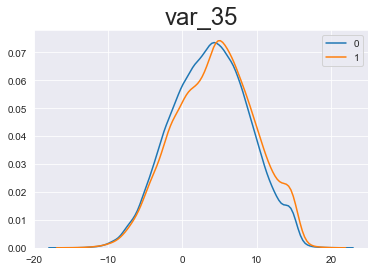

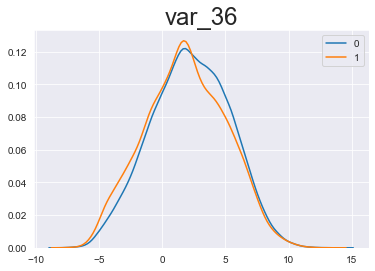

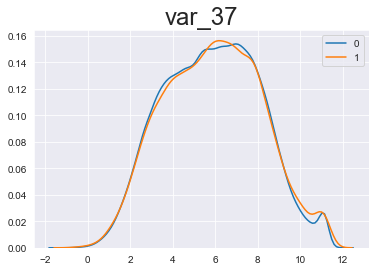

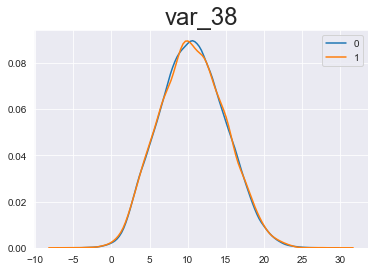

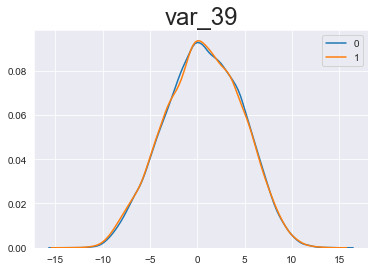

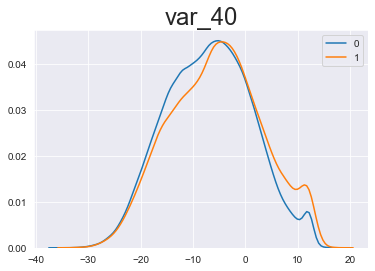

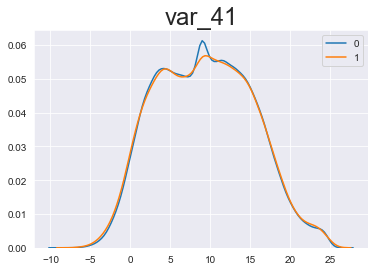

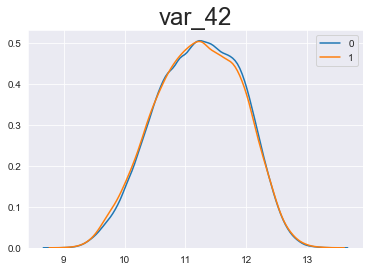

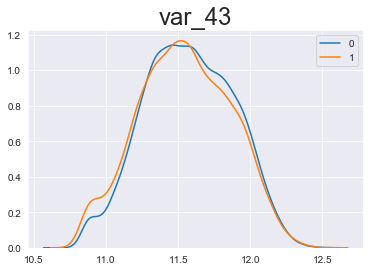

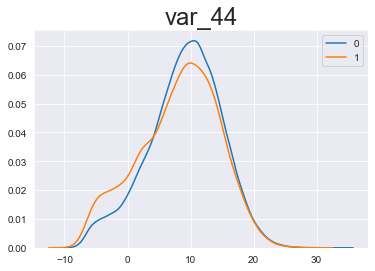

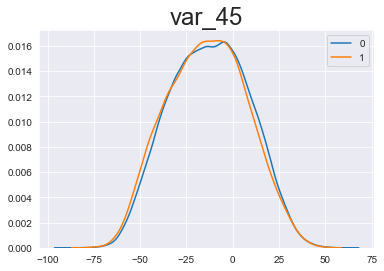

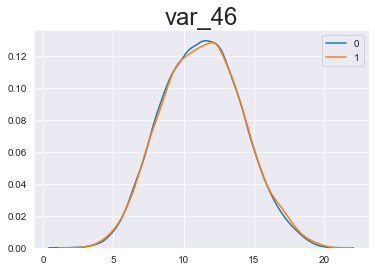

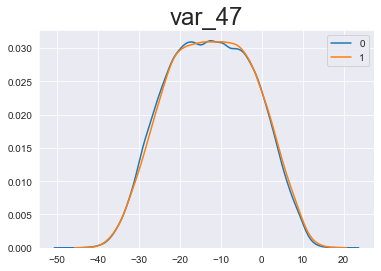

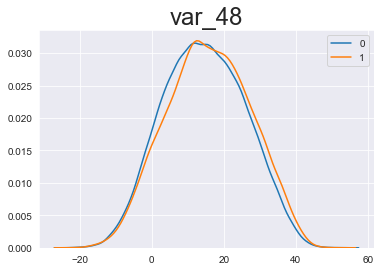

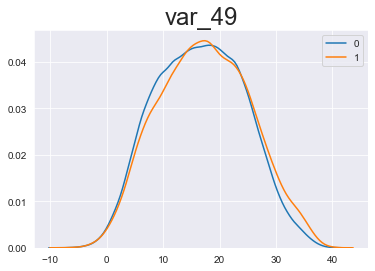

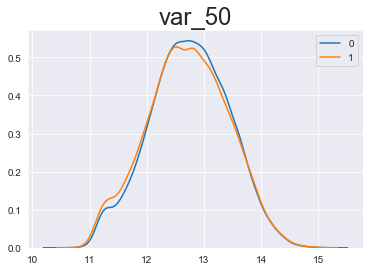

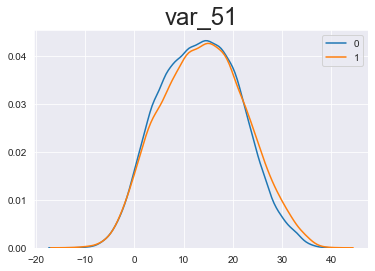

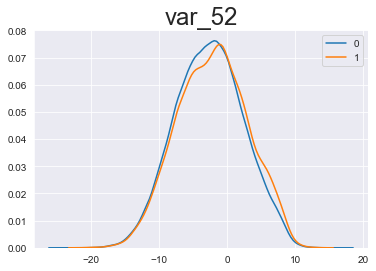

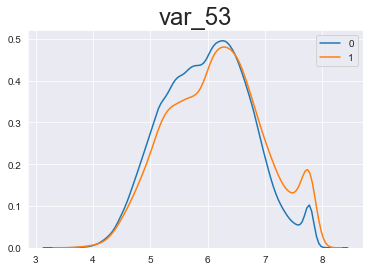

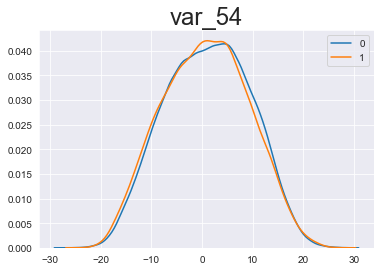

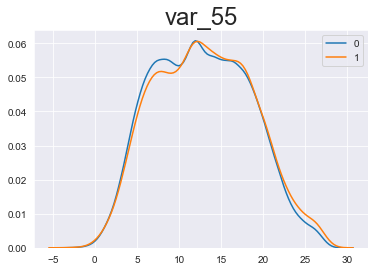

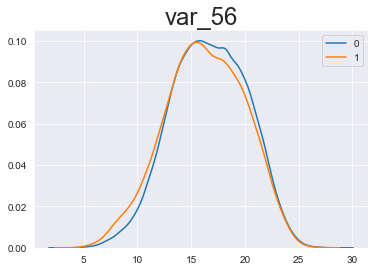

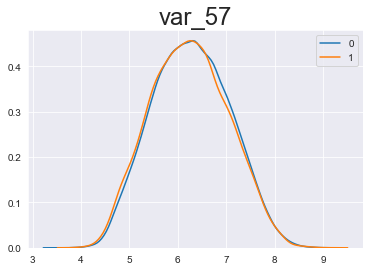

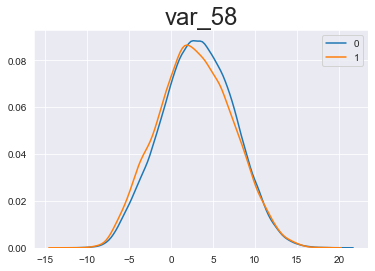

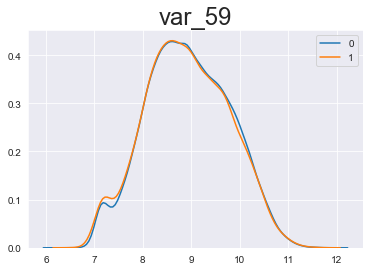

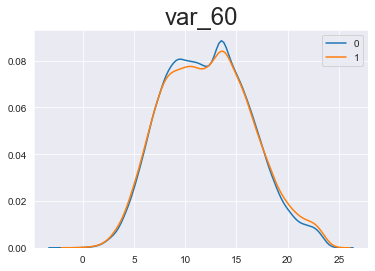

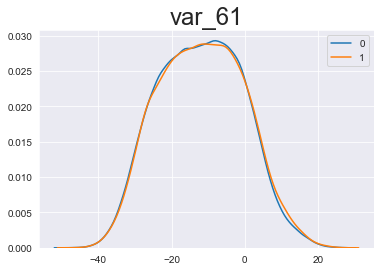

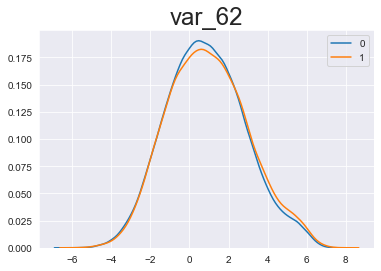

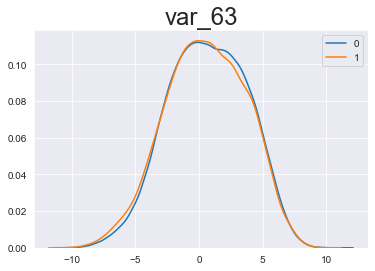

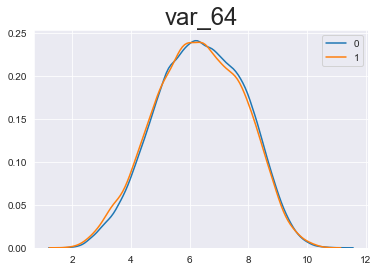

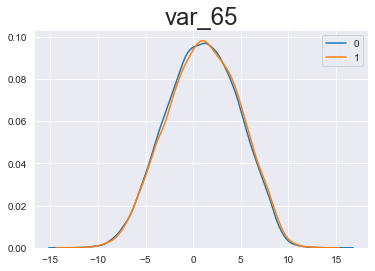

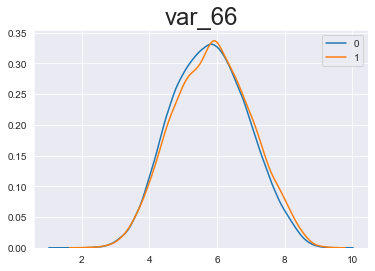

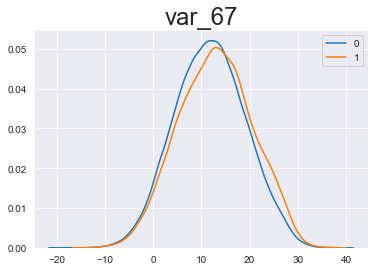

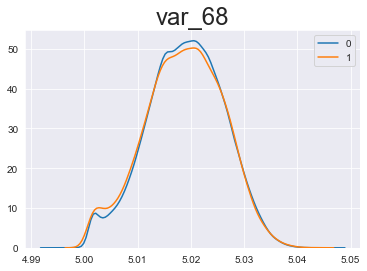

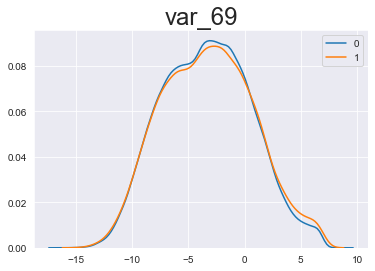

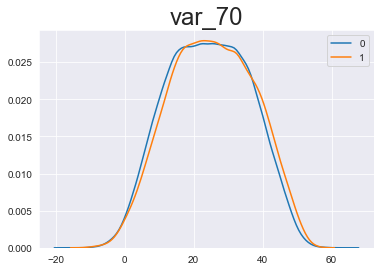

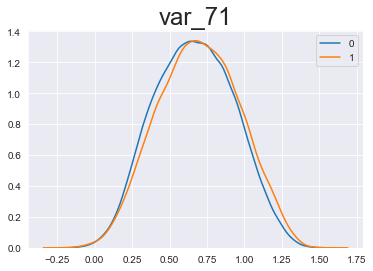

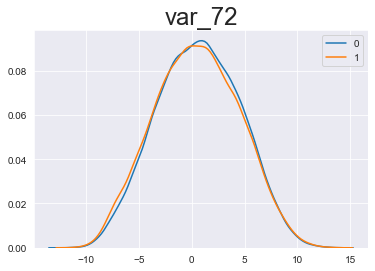

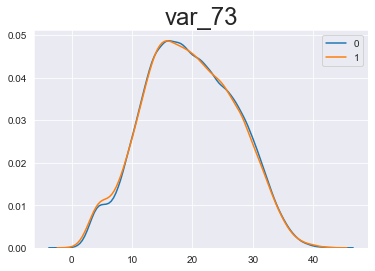

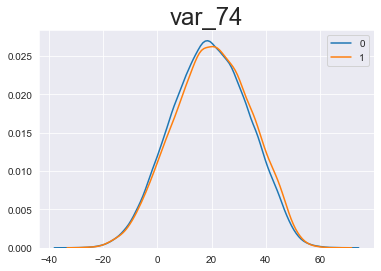

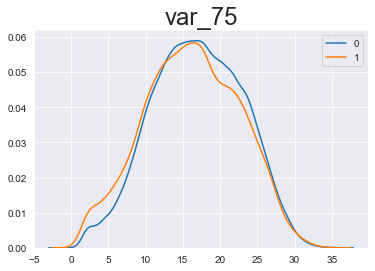

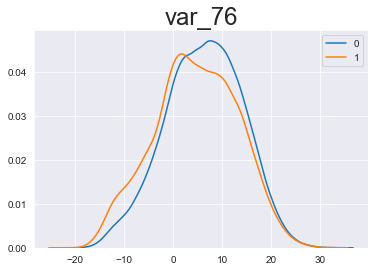

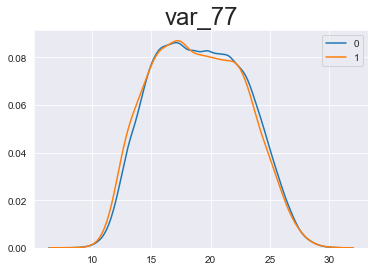

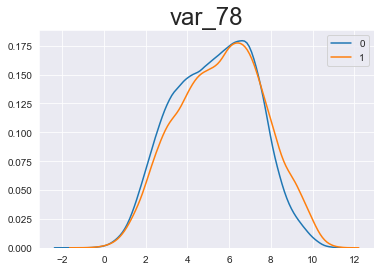

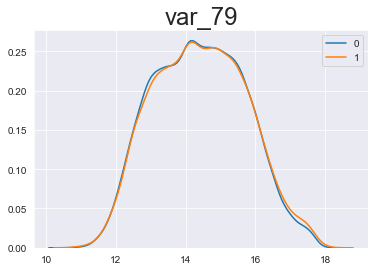

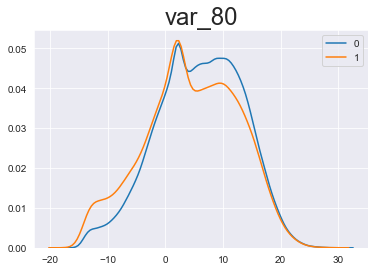

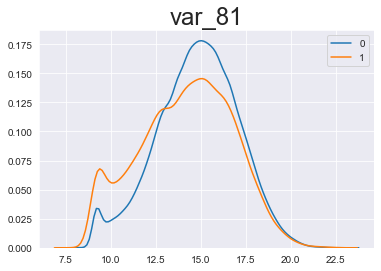

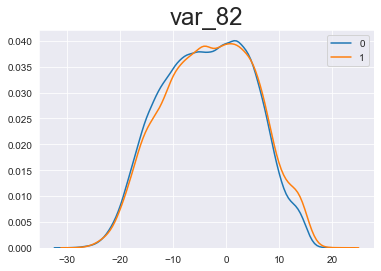

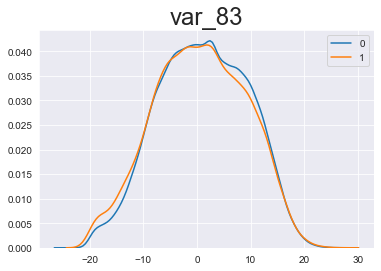

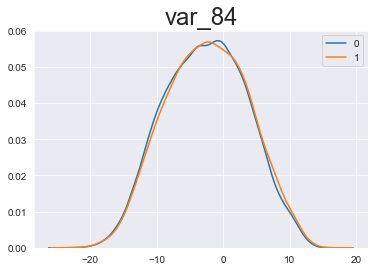

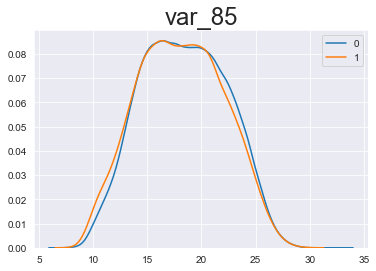

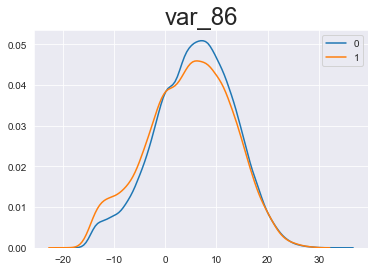

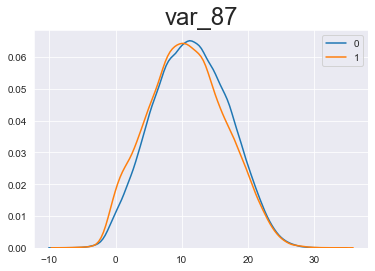

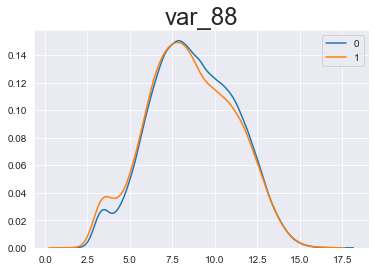

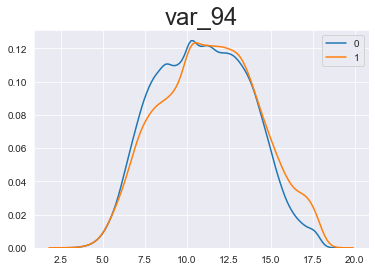

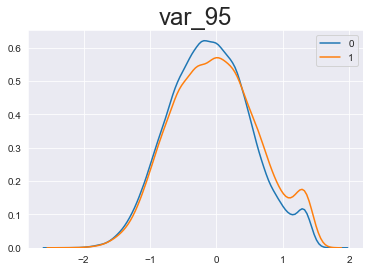

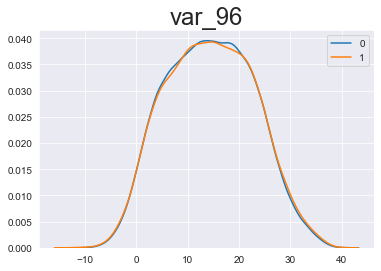

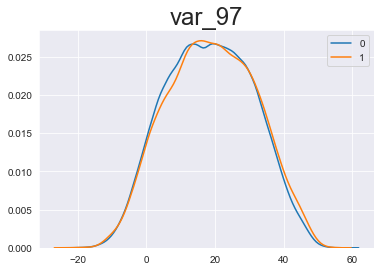

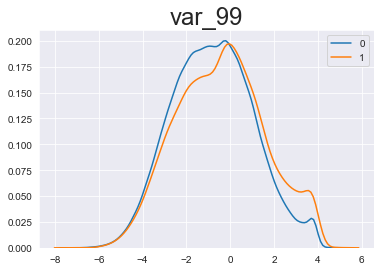

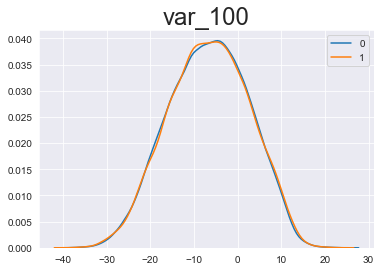

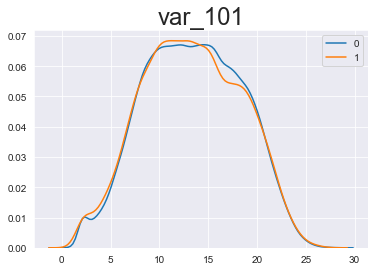

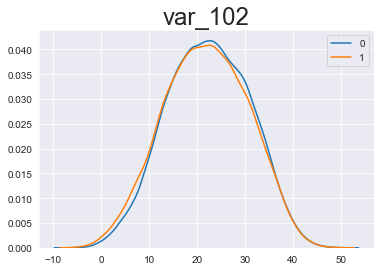

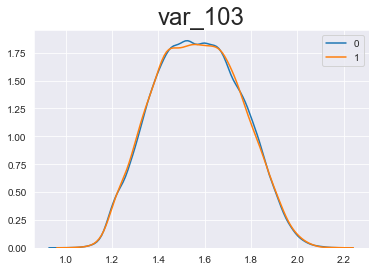

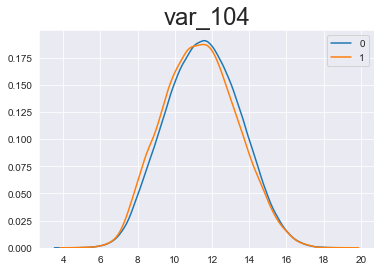

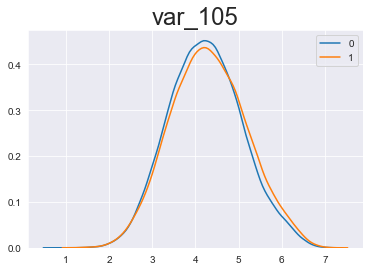

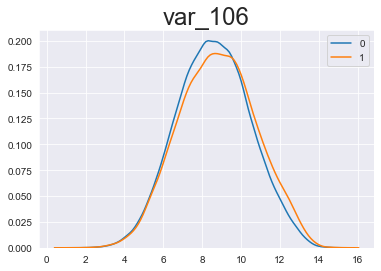

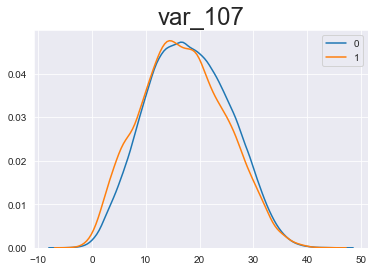

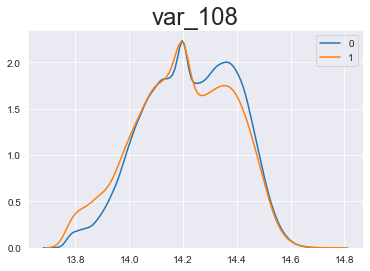

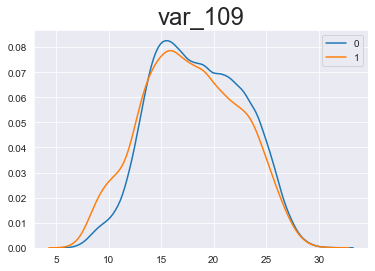

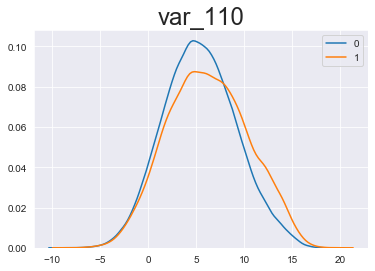

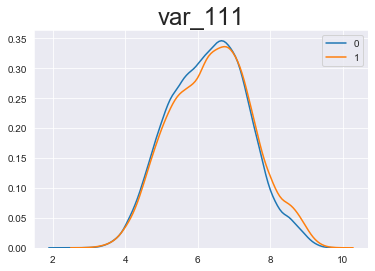

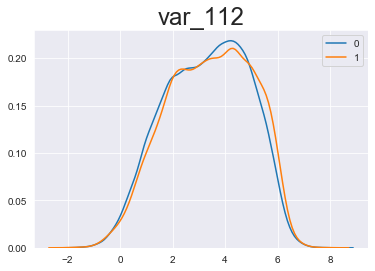

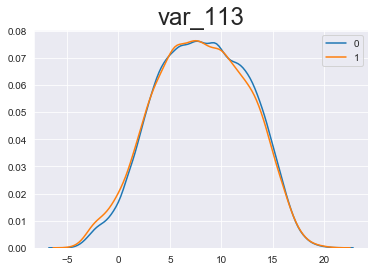

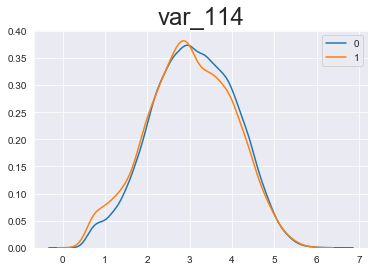

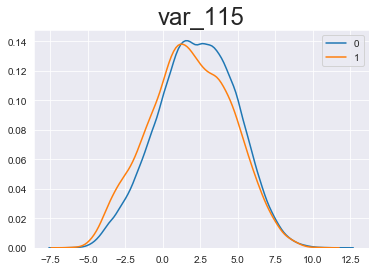

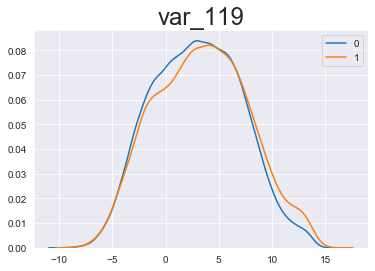

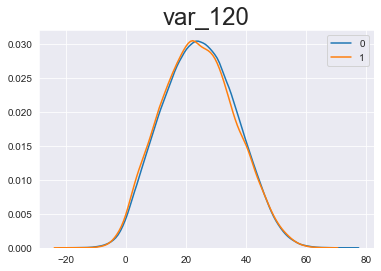

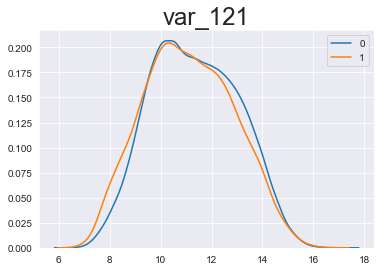

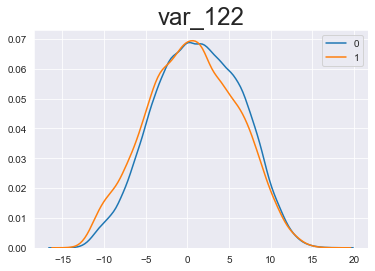

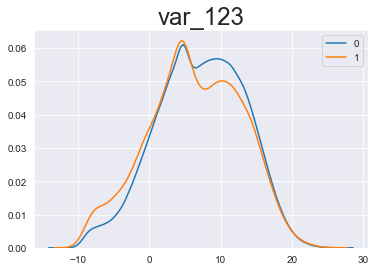

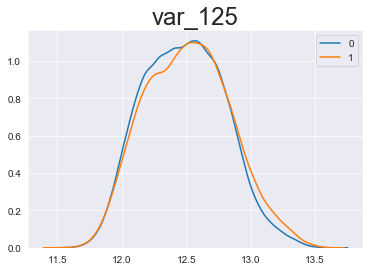

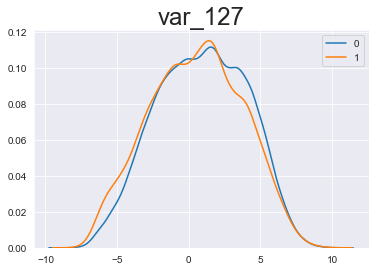

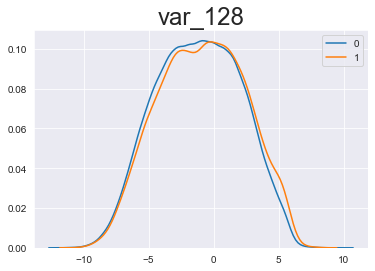

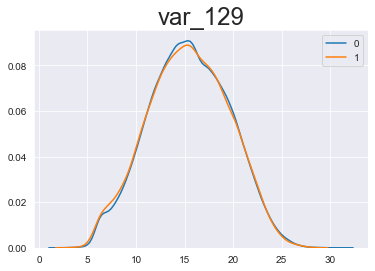

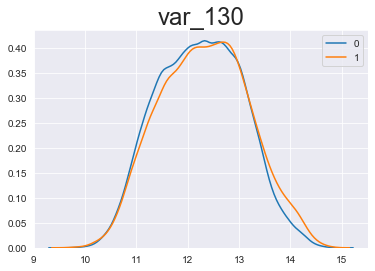

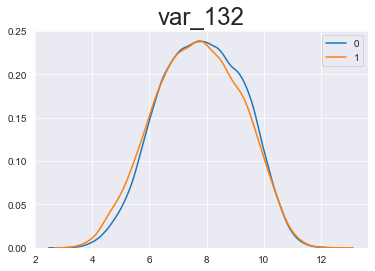

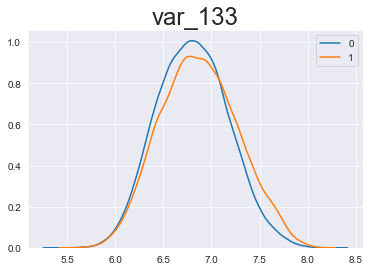

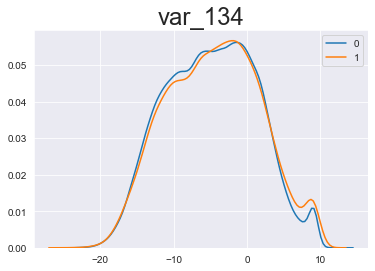

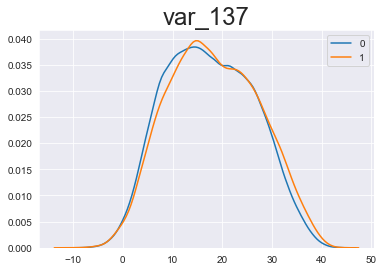

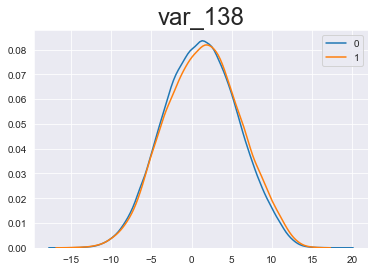

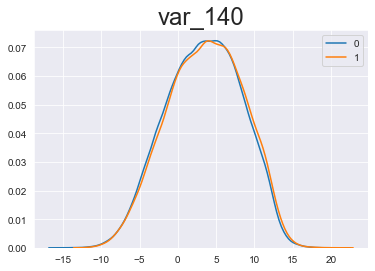

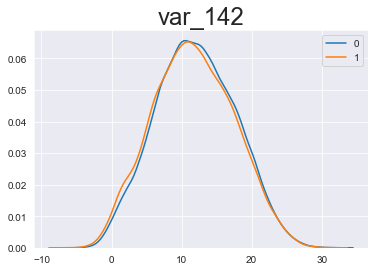

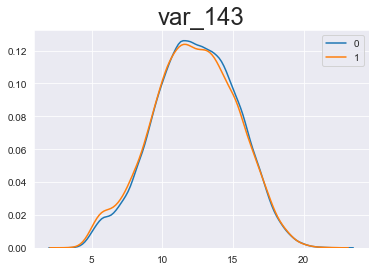

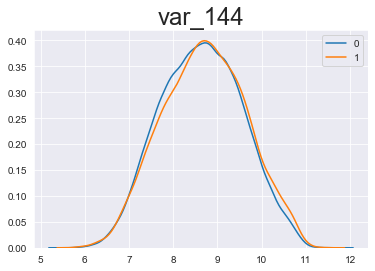

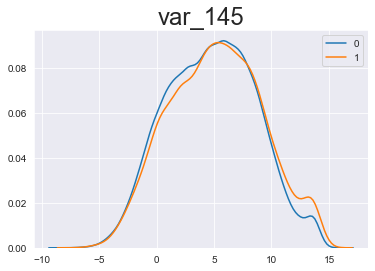

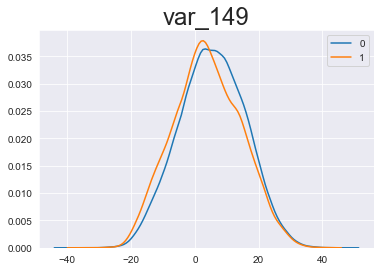

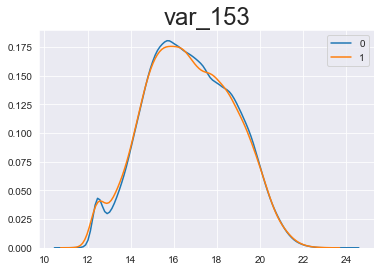

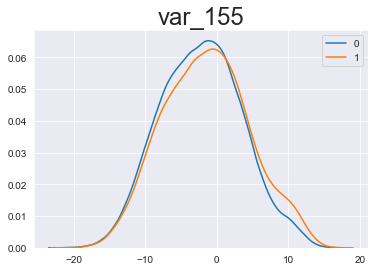

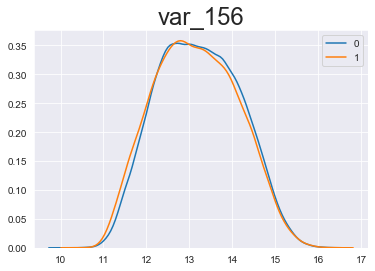

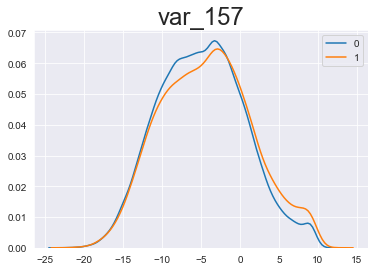

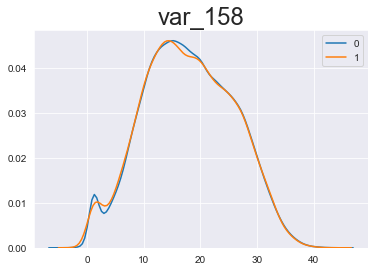

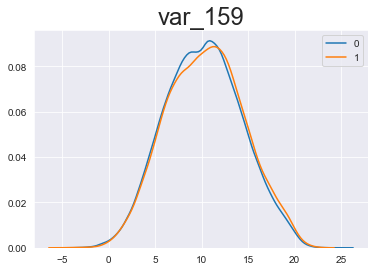

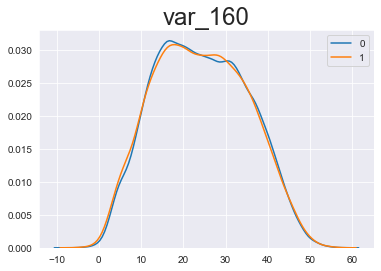

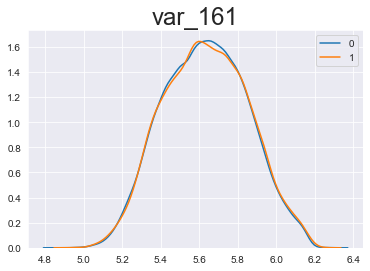

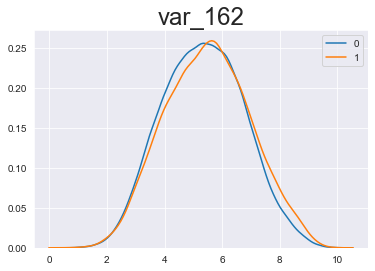

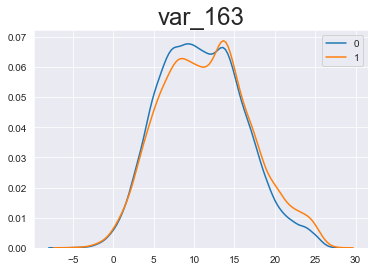

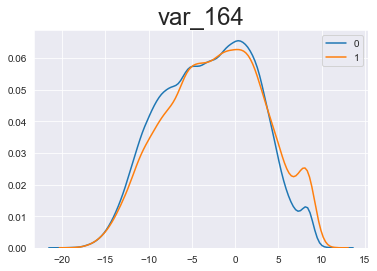

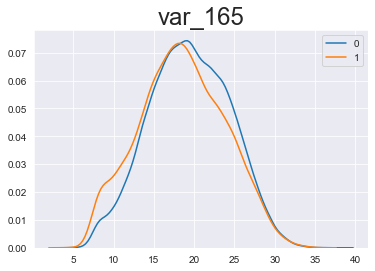

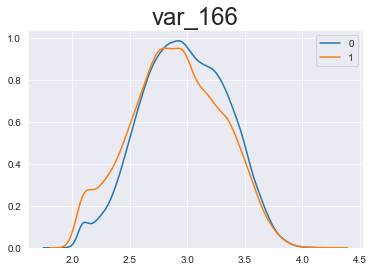

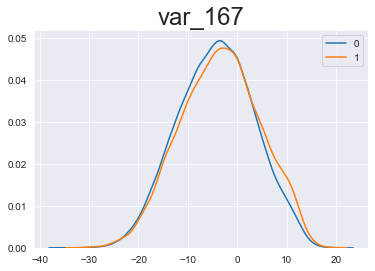

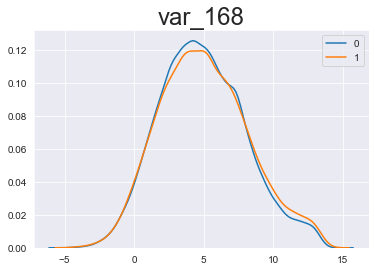

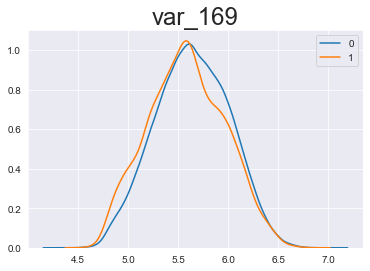

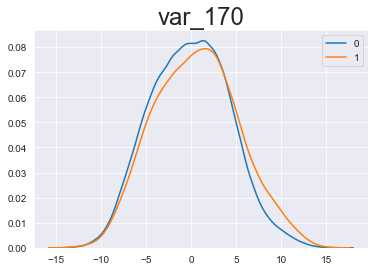

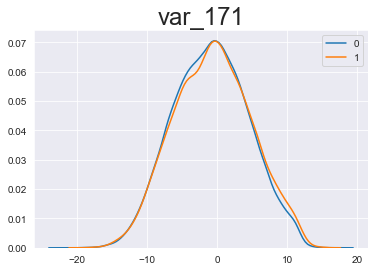

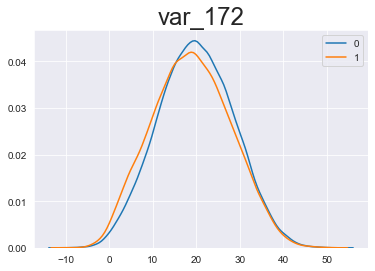

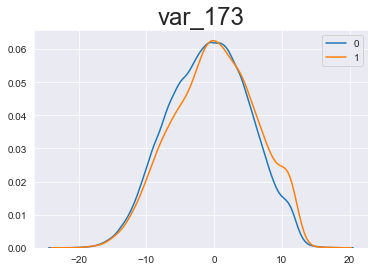

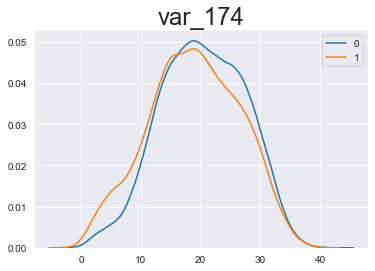

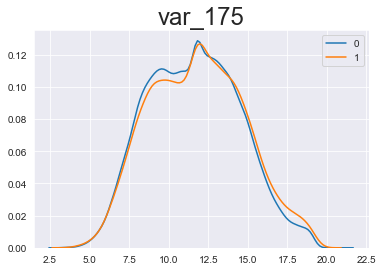

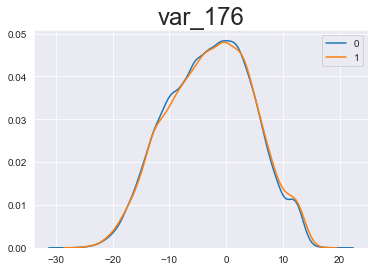

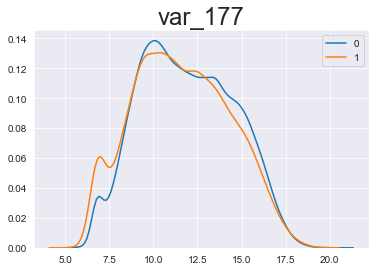

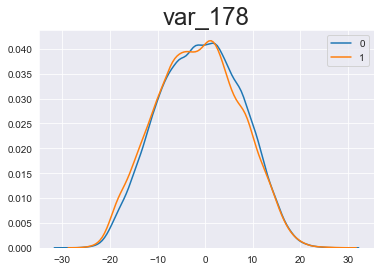

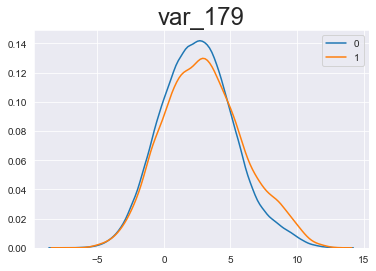

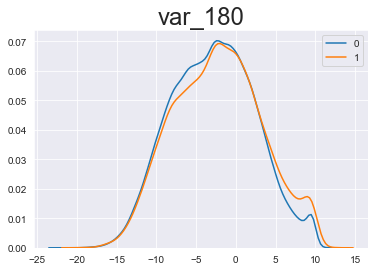

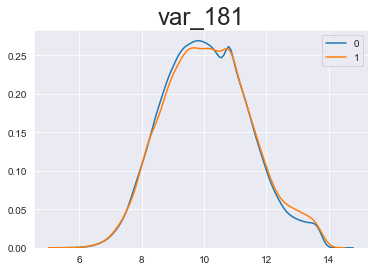

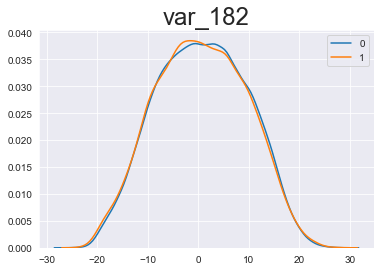

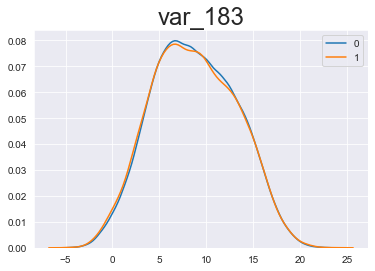

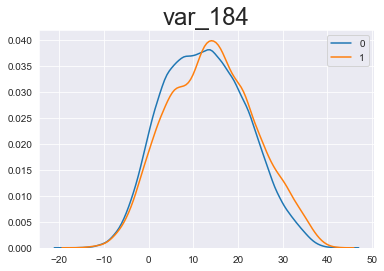

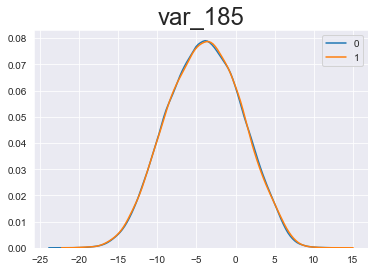

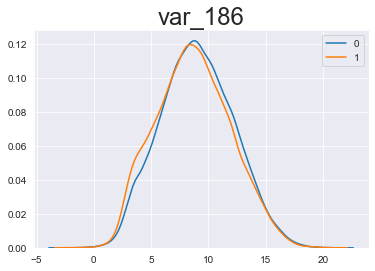

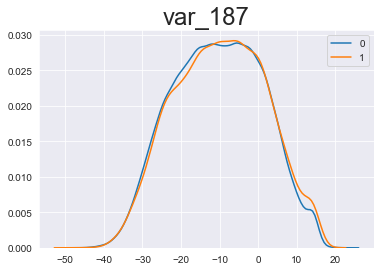

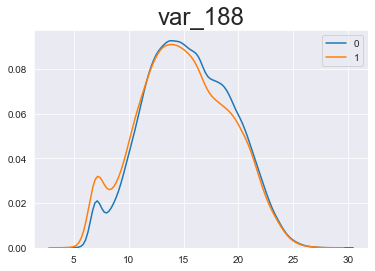

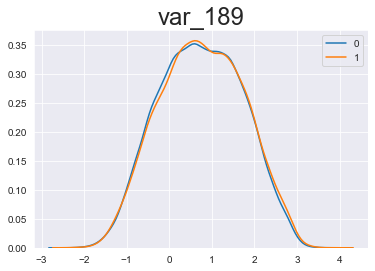

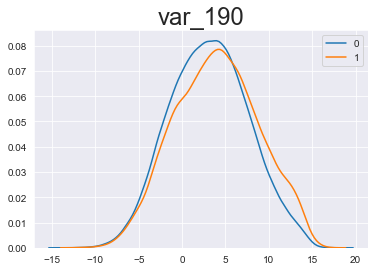

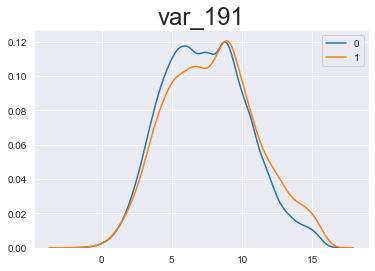

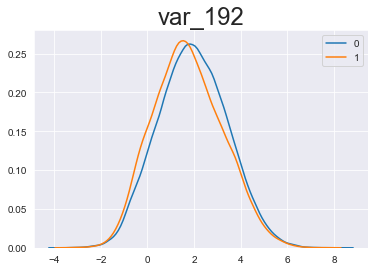

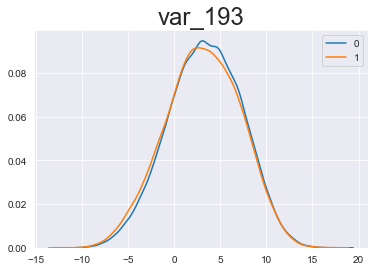

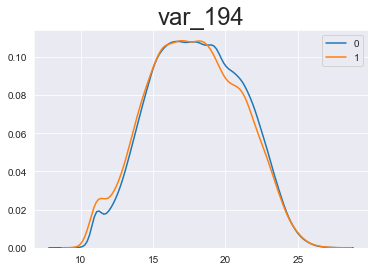

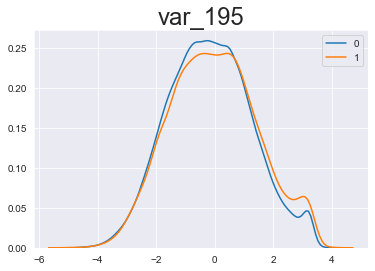

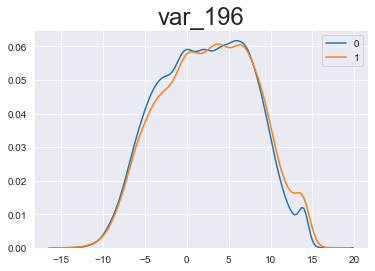

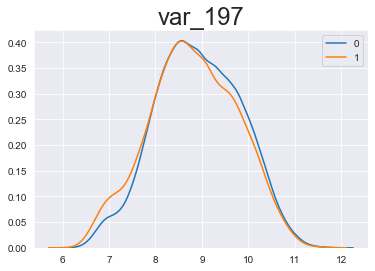

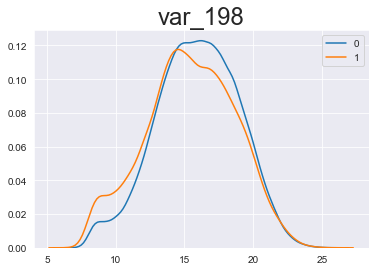

In [14]:
for col in df_trainset.columns[2:]:
    sns.kdeplot(df0[col], label = "0")
    sns.kdeplot(df1[col], label = '1')
    plt.title(label = col, size = 24)
    plt.legend()
    plt.show()